# How many samples do I need?

#### Author: David Linnard Wheeler | dlinnard@berkeley.edu 

## Motivation

Let's say that we want to test the hypothesis that grain-free dog diets do not reduce taurine levels (an amino acid that, when deficient, is associated with canine dilated cardiomyopathy (DCM)) in dogs compared to the standard grain-inclusive diet.

More formally: 
   - $H_0$= $\overline{x}_{0} \ngtr \overline{x}_{gf}$
   - $H_A$= $\neg H_0 \implies \overline{x}_{0} > \overline{x}_{gf}$
    
   where:
       - $\overline{x}_{0}$ = the mean $\overline{x}$ sampled from the reference/null distribution $H_0$ of dogs who ate a grain-iclusive diet
       - $\overline{x}_{gf}$ = the mean $\overline{x}$ sampled from the alternative distribution $H_A$ of dogs who ate a grain-free diet 

**From this formulation, how many samples do we *need* from dogs fed grain-free diets to detect an effect, if one exists?**

To this question, we need to invoke **power**: $P(\text{reject}\;H_0|H_0 \text{ is false}) \equiv 1-\underbrace{P(\text{do not reject }H_0| H_0\text{ is false})}_\text{type II error = $\beta$} \equiv 1-\beta$

Visually, power can be expressed:

In [3]:
library(repr)
library(plotrix)
library(pwr)

The $H_0$ distribution with mean, $\overline{x}_{0}$. Note that this data is simulated to illustrate statistical concepts- it should not be interpreted as evidence for or against any type of dog diet!

$\overline{x}_{0}$

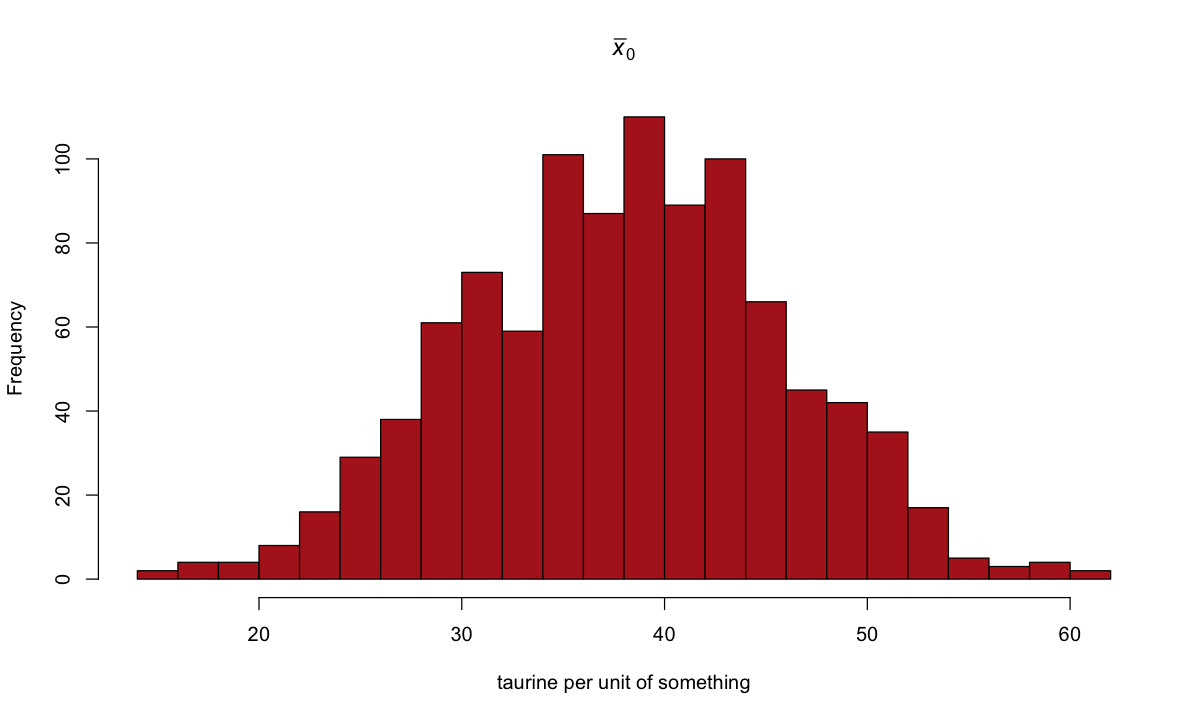

In [4]:
# Generate data
x_gi = rnorm(1000, mean=38.3, sd=8)
# Plot
# Change plot size
options(repr.plot.width=10, repr.plot.height=6)
# Plot and name histogram
x_gi_hist=hist(x_gi ,
     breaks=25,
     main=expression(paste(italic(bar(x)[0]))),
     xlab="taurine per unit of something",
     col="firebrick")

$\overline{x}_{gf}$

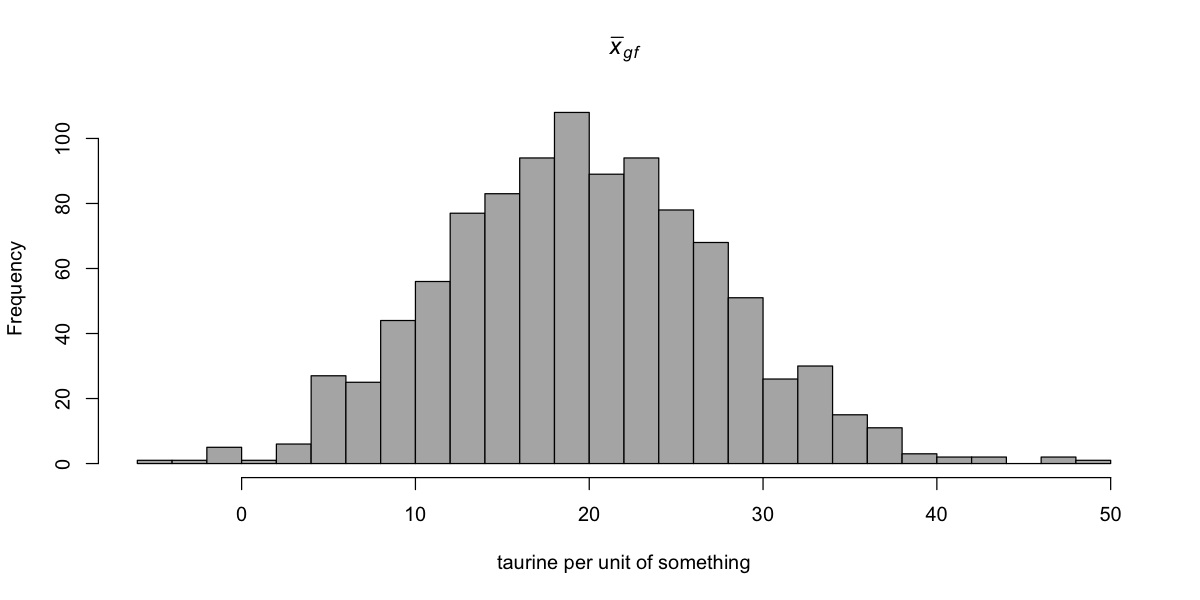

In [5]:
# Generate data
x_gf = rnorm(1000, mean=20, sd=8)
# Plot
# Change plot size 
options(repr.plot.width=10, repr.plot.height=5)
x_gf_hist=hist(x_gf ,
     breaks=25,
     main=expression(paste(italic(bar(x)[gf]))),
     xlab="taurine per unit of something",
     col="grey70")


$\overline{x}_{gi}$ vs $\overline{x}_{gf}$

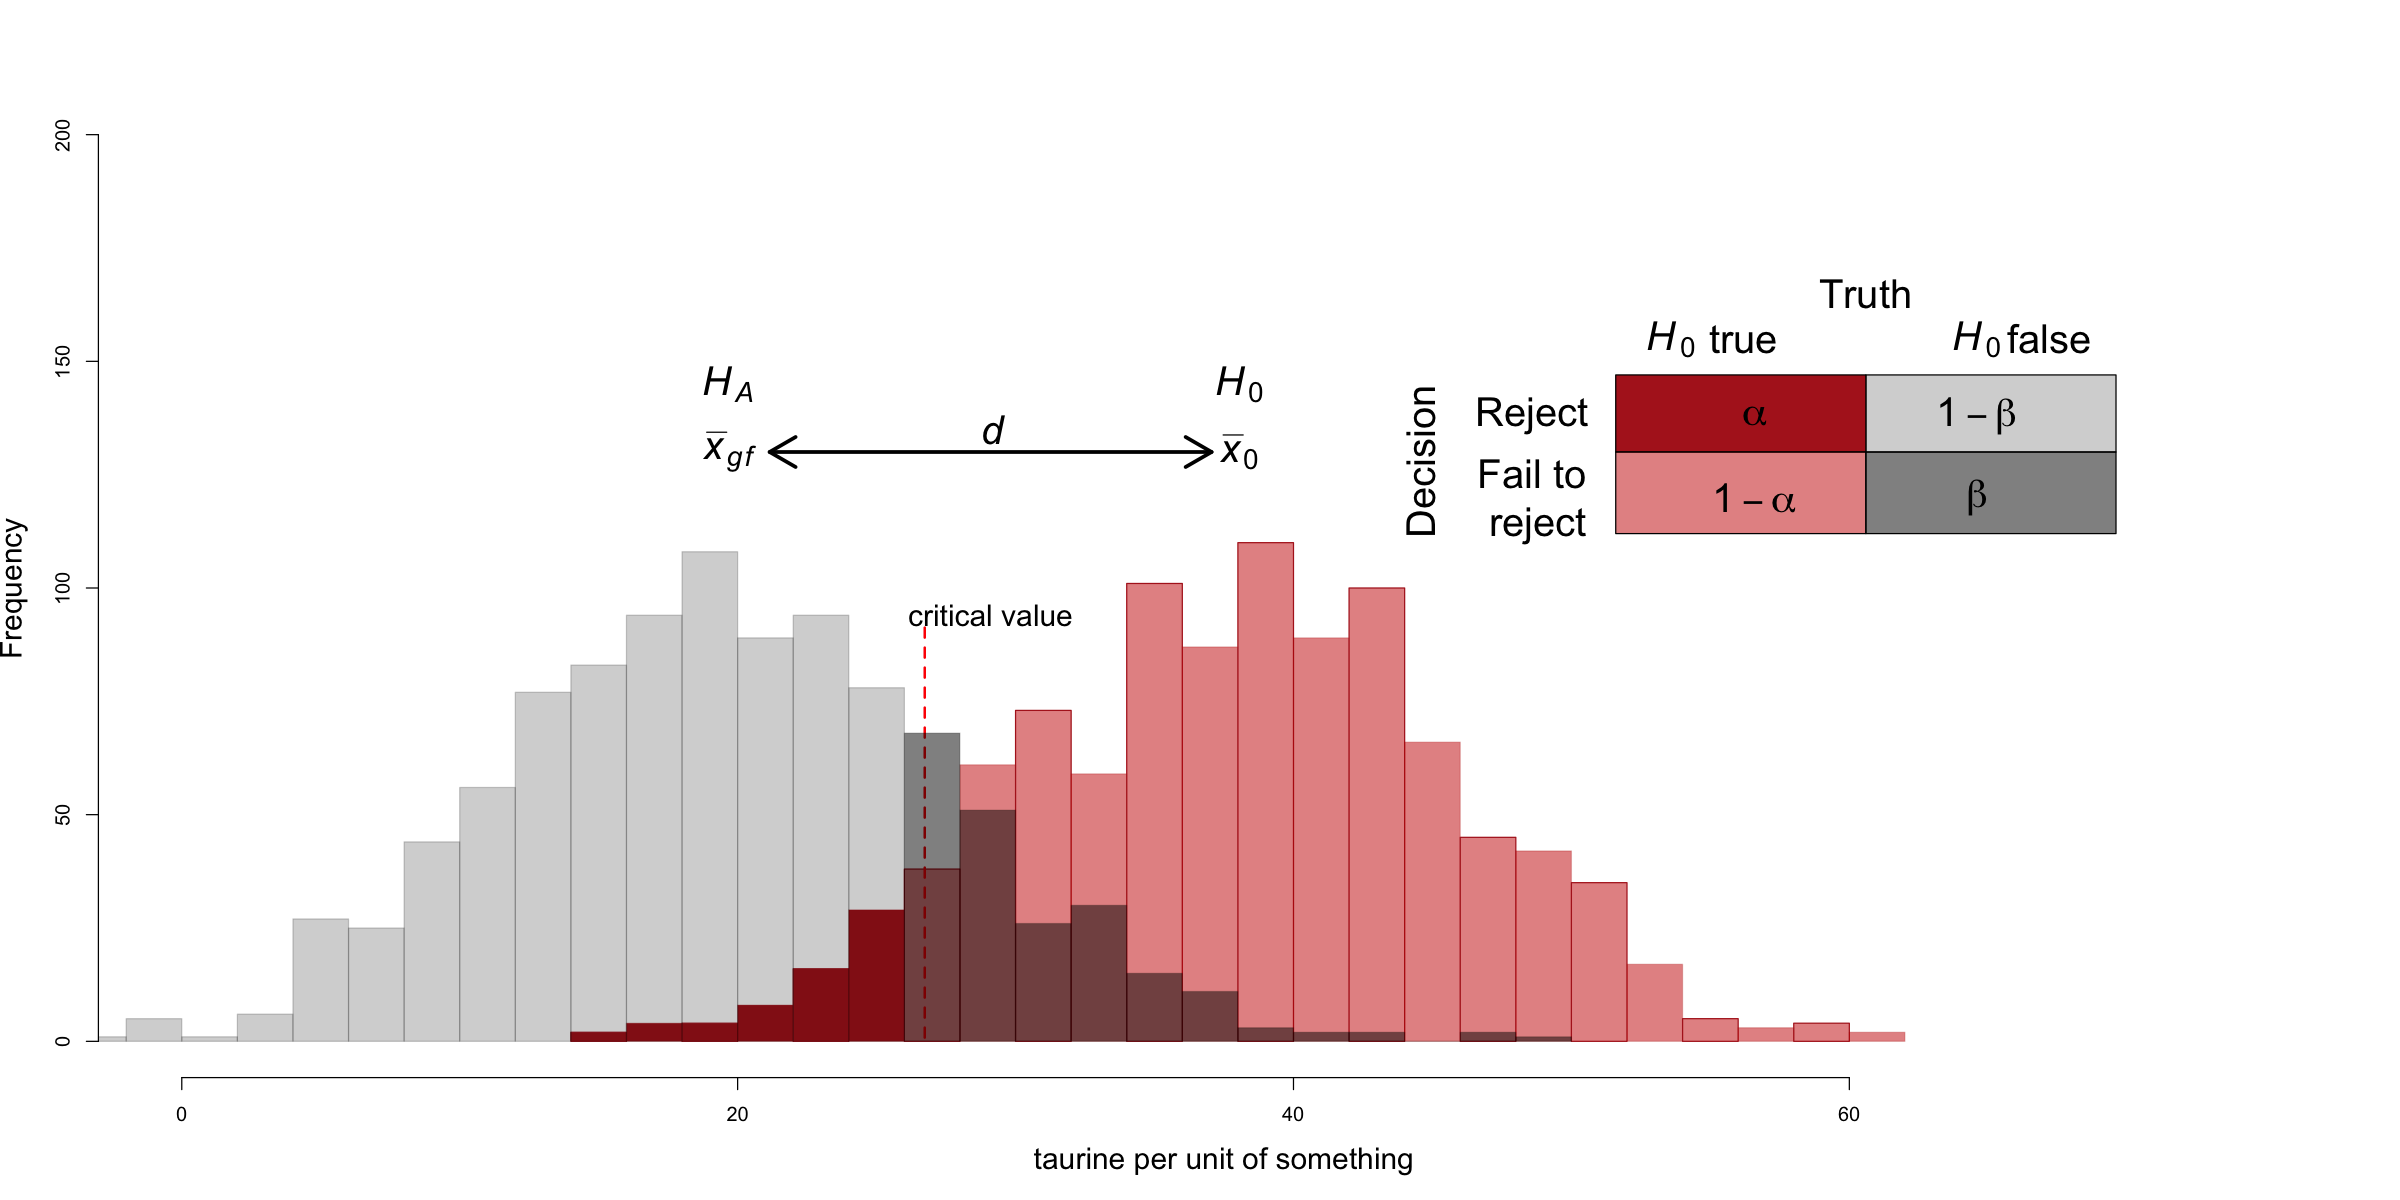

In [6]:
# Change plot size to 4 x 3
options(repr.plot.width=20, repr.plot.height=10)
#####################
# H0: Grain-inclusive distribution
# Plot
plot(x_gi_hist,
     col= c("firebrick",rgb(0.8,0,0,1/2))[cut(x_gi_hist$breaks, c(-Inf, max(sort(x_gi)[(1: (length(x_gi)*0.05))]),Inf))],   
     xlim=c(0,75), ylim=c(0,200), main="", xlab="taurine per unit of something",
     cex.lab=1.5,
     border=c("firebrick",rgb(0.7,0,0,1/4)))
# Null label
text(x=mean(x_gi), y=max(x_gi_hist$counts)+35,
    label = expression(paste(italic(H[0]))),
    cex=2)
# Mean label 
text(x=mean(x_gi), y=max(x_gi_hist$counts)+20,
    label = expression(paste(italic(bar(x)[0]))),
    cex=2)

# Critical value
ablineclip(v=max(sort(x_gi)[(1: (length(x_gi)*0.05))]+1.4),
           lwd=2,lty=2, col="red",
           y1=0,y2=max(x_gf_hist$counts)-15)
# Critical value
text(x=max(sort(x_gi)[(1: (length(x_gi)*0.05))]+0.8), y=max(x_gf_hist$counts)-14,
    label="critical value", adj=0,cex= 1.5)

# Effect size arrow
arrows(x0=mean(x_gf)+1.5, x1=mean(x_gi)-1,
       y0=max(x_gi_hist$counts)+20, y1=max(x_gi_hist$counts)+20,
       lty=1, code=3, lwd=3, col="black")
# Effect size label
text(x=mean(x_gf) + (1/4 * mean(x_gi)), y= max(x_gi_hist$counts)+25,
    label = expression(paste(italic(d))),
    cex=2)

#####################
# HA: Grain-free distribution
# Plot GF
plot(x_gf_hist,
     col= c(rgb(0,0,0,0.2), rgb(0,0,0,0.5))[cut(x_gf_hist$breaks, c(-Inf, max(sort(x_gi)[(1: (length(x_gi)*0.05))]),Inf))],  
     xlim=c(0,75),ylim=c(0,200),
     add=T, border=rgb(0,0,0,0.2))
#abline(v=mean(x_gf),lwd=2, col="grey")
# Mean label 
text(x=mean(x_gf), y=max(x_gi_hist$counts)+20,
    label = expression(paste(italic(bar(x)[gf]))),
    cex=2, font=2)
# HA label
text(x=mean(x_gf), y=max(x_gi_hist$counts)+35,
    label = expression(paste(italic(H[A]))),
    cex=2)


#####################
### Confusion matrix
## Labels
# Truth
text(x=max(x_gi)-1, y=max(x_gi_hist$counts)+55,
    label = "Truth",
    cex=2)
# H0 true
text(x=max(x_gi)-8, y=max(x_gi_hist$counts)+45,
    label = c(expression(paste(italic(H[0]))),"             true"),
    cex=2)
# H0 false
text(x=max(x_gi)+3, y=max(x_gi_hist$counts)+45,
    label = c(expression(paste(italic(H[0]))),"             false"),
    cex=2)

# Decision
text(x=max(x_gi)-17, y=max(x_gi_hist$counts)+18,
    label = "Decision",
    cex=2,srt=90)
# Reject
text(x=max(x_gi)-13, y=max(x_gi_hist$counts)+28,
    label = "Reject",
    cex=2)
# Fail to reject
text(x=max(x_gi)-13, y=max(x_gi_hist$counts)+10,
    label = "Fail to\n reject",
    cex=2)

## Contents
# True positives
rect(xleft=max(x_gi)-1,xright=max(x_gi)+8,
     ytop=max(x_gi_hist$counts)+37,ybottom=max(x_gi_hist$counts)+20, col=rgb(0,0,0,0.2))
# 1-beta = sensitivity
text(x=max(x_gi)+3, y=max(x_gi_hist$counts)+28,
    label = expression(paste(italic(1-beta))),
    cex=2)

# False positives
rect(xleft=max(x_gi)-10,xright=max(x_gi)-1,
     ytop=max(x_gi_hist$counts)+37,ybottom=max(x_gi_hist$counts)+20, col="firebrick")
# Alpha = type I error
text(x=max(x_gi)-5, y=max(x_gi_hist$counts)+28,
    label = expression(paste(italic(alpha))),
    cex=2)

# # True negatives
# rect(xleft=65,xright=75,
#      ytop=155,ybottom=135, col=rgb(0,0,0,0.5))
rect(xleft=max(x_gi)-10,xright=max(x_gi)-1,
     ytop=max(x_gi_hist$counts)+20,ybottom=max(x_gi_hist$counts)+2, col=rgb(0.8,0,0,0.5))
# 1-Alpha = specificity
text(x=max(x_gi)-5, y=max(x_gi_hist$counts)+10,
    label= expression(paste(italic(1-alpha))),
    cex=2)

# False negatives
rect(xleft=max(x_gi)-1,xright=max(x_gi)+8,
     ytop=max(x_gi_hist$counts)+20,ybottom=max(x_gi_hist$counts)+2, col=rgb(0,0,0,0.5))
# beta = Type II error
text(x=max(x_gi)+3, y=max(x_gi_hist$counts)+10,
    label = expression(paste(italic(beta))),
    cex=2)

**Note that power depends on:**
> - the effect size (e.g. the magnitude of the distance between means) which can be absolute or relative
> - some expression of variability (e.g. sample standard deviation, $s$)
> -$N$
> - $\alpha$. Notice that, aside from considering departures from the $\alpha$ = 0.05 convention, the allocation of $\alpha$ to one or two tails of the $H_0$ affects power.

**Question: which of these can we actually change?**

Let's increase $N$ and see what happens:

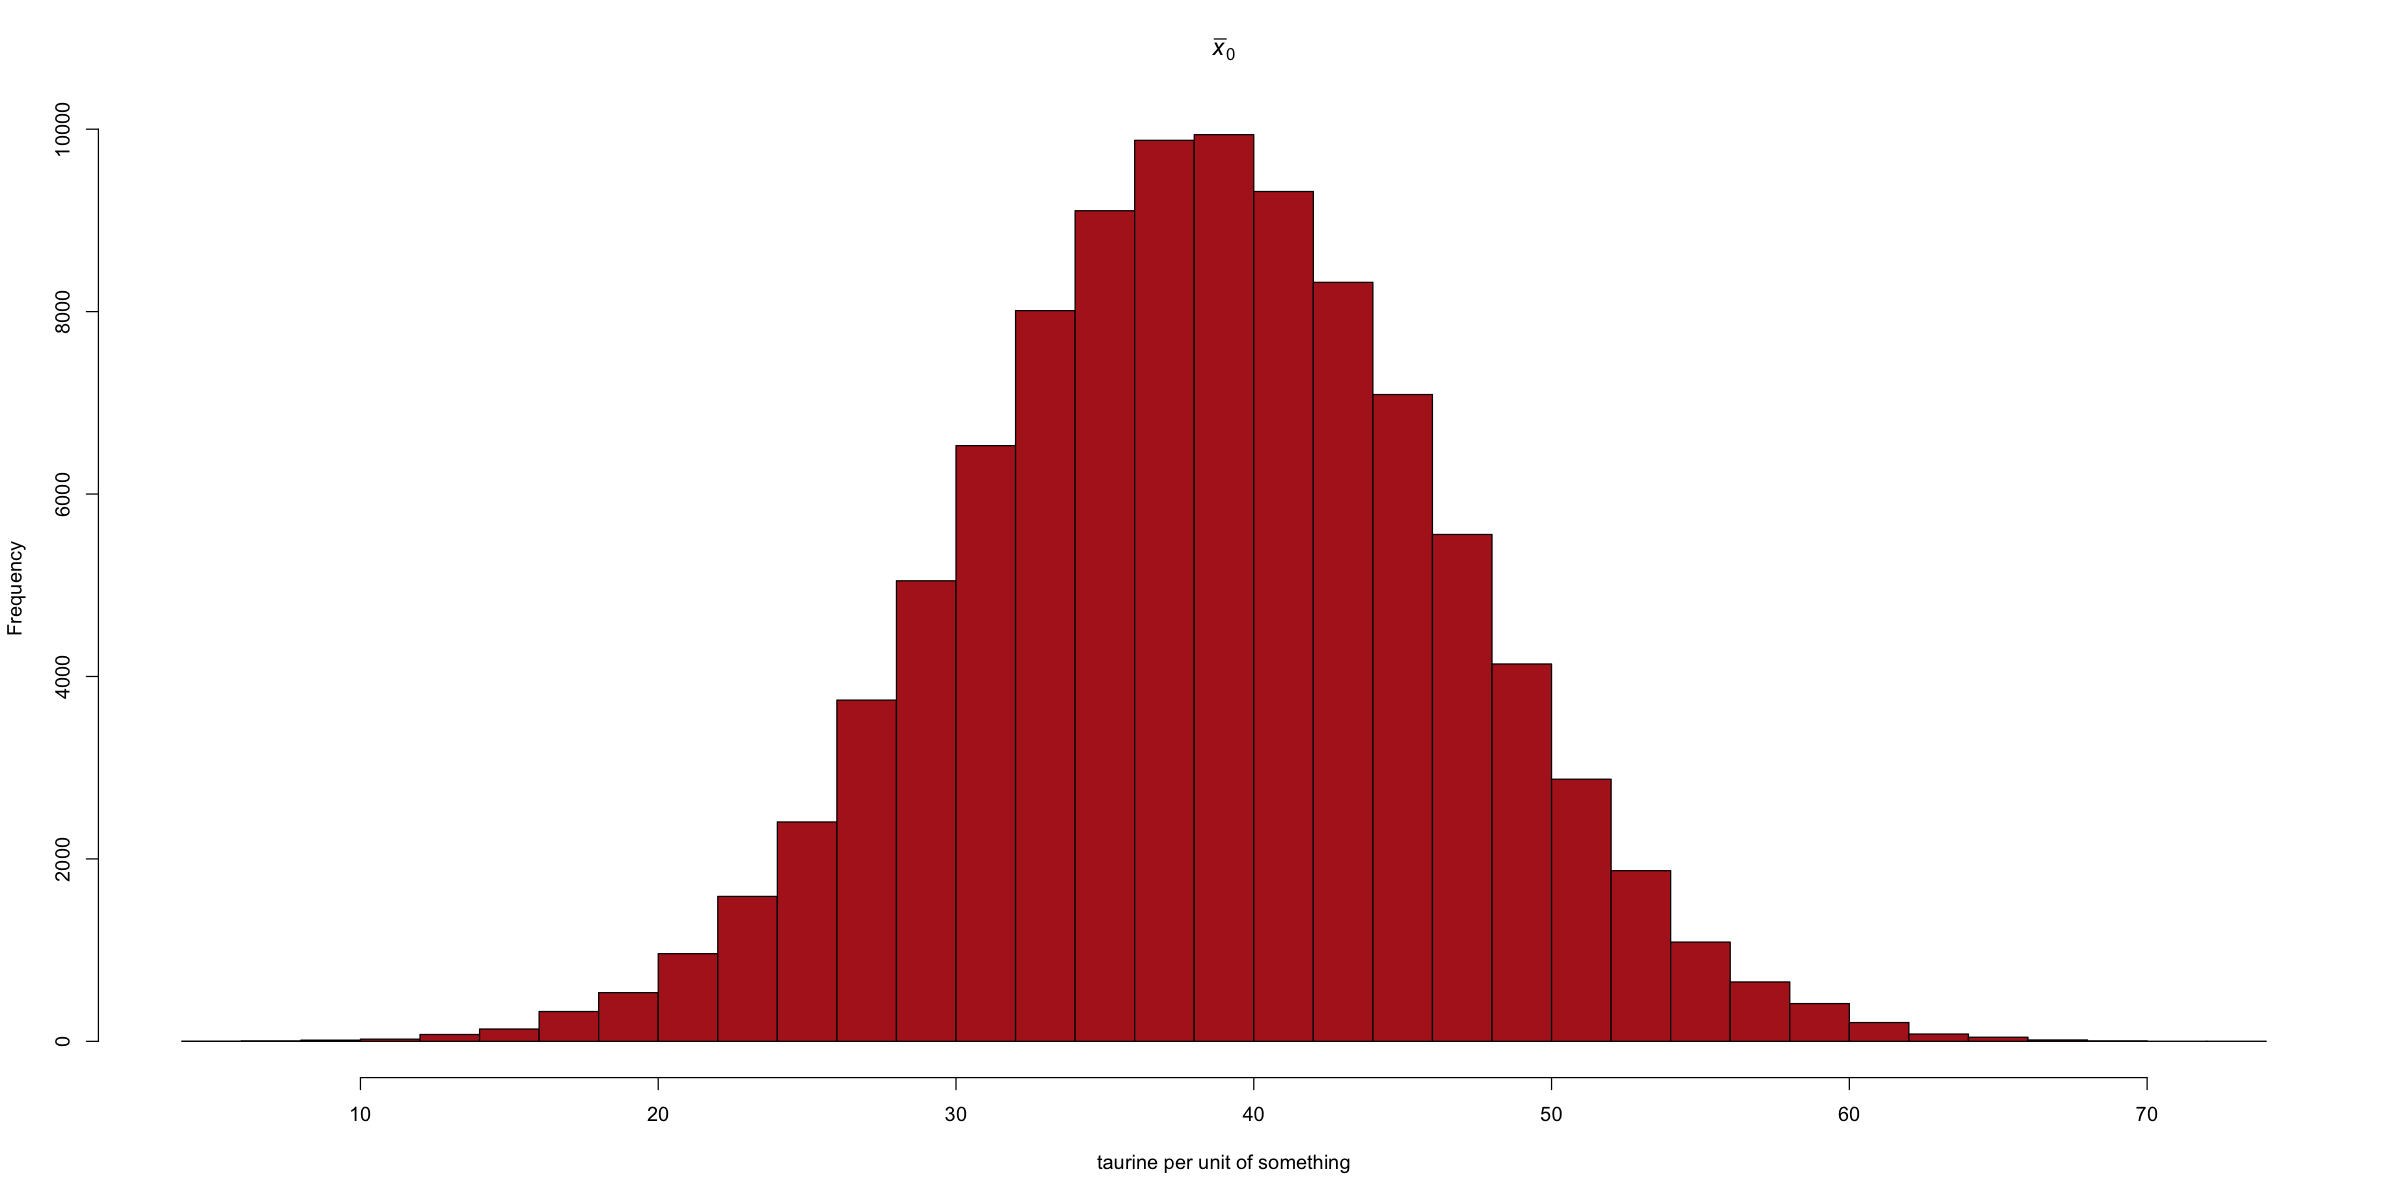

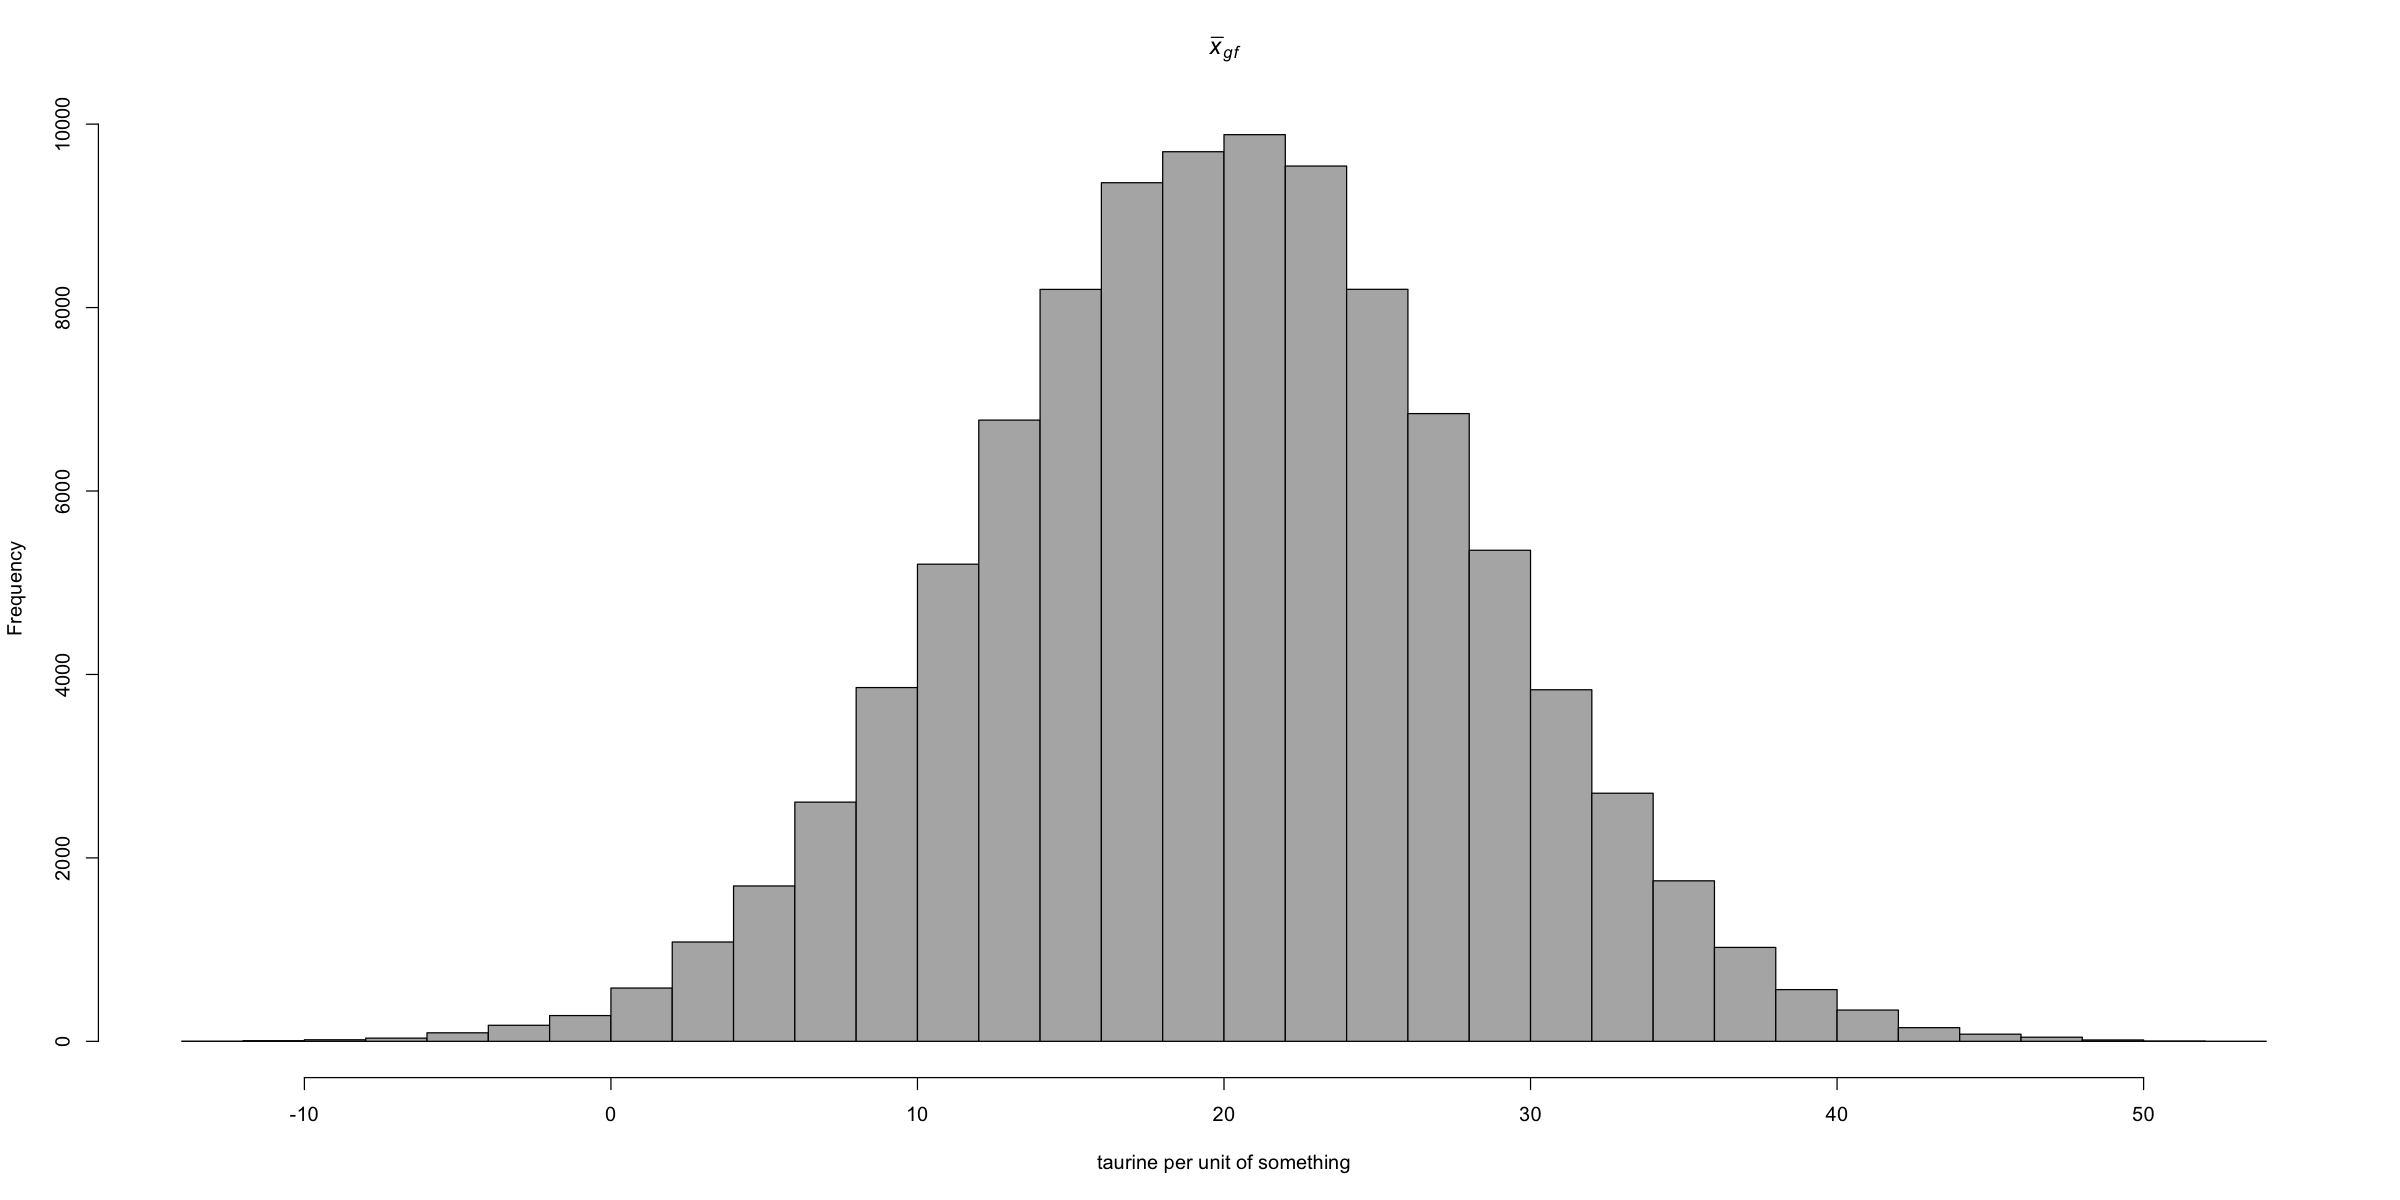

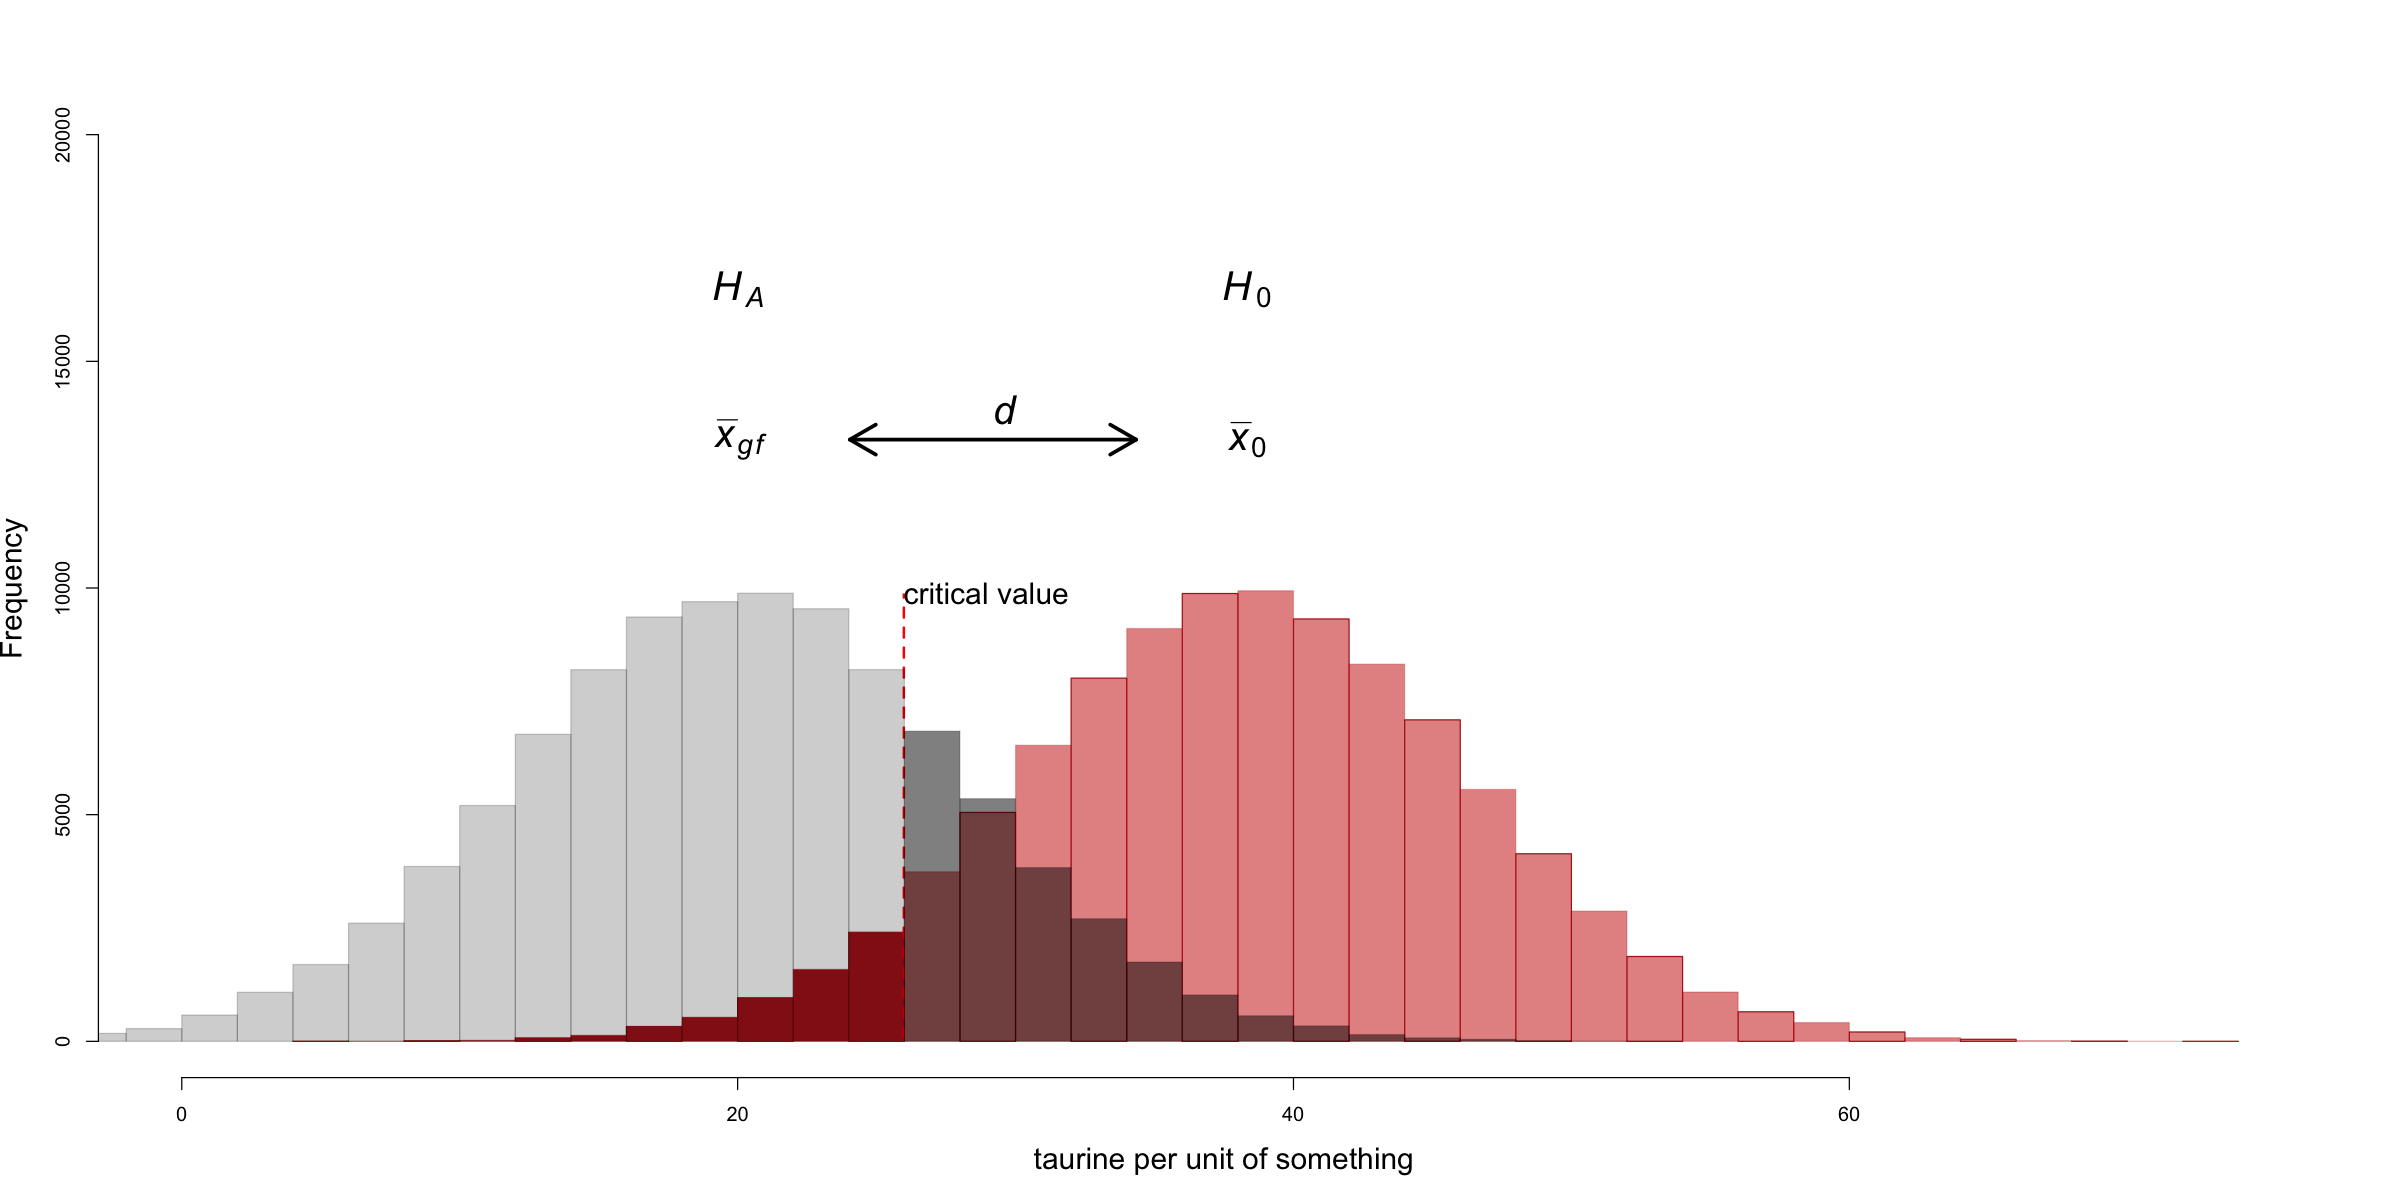

In [56]:
# N = sample size
N = 100000

# Sample 1
x_gi = rnorm(N, mean=38.3, sd=8)
# Plot
x_gi_hist=hist(x_gi ,
     breaks=25,
     main=expression(paste(italic(bar(x)[0]))),
     xlab="taurine per unit of something",
     col="firebrick")

# Sample 2
x_gf = rnorm(N, mean=20, sd=8)
# Plot
x_gf_hist=hist(x_gf ,
     breaks=25,
     main=expression(paste(italic(bar(x)[gf]))),
     xlab="taurine per unit of something",
     col="grey70")

# Both samples together
#####################
# H0: Grain-inclusive distribution
# Plot
plot(x_gi_hist,
     col= c("firebrick",rgb(0.8,0,0,1/2))[cut(x_gi_hist$breaks, c(-Inf, max(sort(x_gi)[(1: (length(x_gi)*0.05))]),Inf))],   
     xlim=c(0,75), ylim=c(0,N/5),
     main="", xlab="taurine per unit of something",
     cex.lab=1.5,
     border=c("firebrick",rgb(0.7,0,0,1/4)))
# H0 label
text(x=mean(x_gi), y=max(x_gi_hist$counts) + (N/15),
    label = expression(paste(italic(H[0]))),
    cex=2)
# Mean label 
text(x=mean(x_gi), y=max(x_gi_hist$counts) + (N/30),
    label = expression(paste(italic(bar(x)[0]))),
    cex=2)

# Critical value
ablineclip(v=max(sort(x_gi)[(1: (length(x_gi)*0.05))]+0.8),
           lwd=2, lty=2, col="red",
           y1=0, y2=max(x_gf_hist$counts)-5)
# Critical value
text(x=max(sort(x_gi)[(1: (length(x_gi)*0.05))]+0.8), y=max(x_gf_hist$counts)-4,
    label="critical value", adj=0,cex= 1.5)

# Effect size arrow
arrows(x0=mean(x_gf)+4, x1=mean(x_gi)-4,
       y0=max(x_gi_hist$counts) + (N/30), y1=max(x_gi_hist$counts) + (N/30),
       lty=1, code=3, lwd=3, col="black")
# Effect size label
text(x=mean(x_gf) + (1/4 * mean(x_gi)), y=max(x_gi_hist$counts) + (N/25),
    label = expression(paste(italic(d))),
    cex=2)

#####################
# HA: Grain-free distribution
# Plot GF
plot(x_gf_hist,
     col= c(rgb(0,0,0,0.2), rgb(0,0,0,0.5))[cut(x_gf_hist$breaks, c(-Inf, max(sort(x_gi)[(1: (length(x_gi)*0.05))]),Inf))],  
     xlim=c(0,75),ylim=c(0,N/5),
     add=T, border=rgb(0,0,0,0.2))
# HA label
text(x=mean(x_gf), y=max(x_gi_hist$counts) + (N/15),
    label = expression(paste(italic(H[A]))),
    cex=2)
# Mean label 
text(x=mean(x_gf), y=max(x_gi_hist$counts) + (N/30),
    label = expression(paste(italic(bar(x)[gf]))),
    cex=2, font=2)


Let's decrease $N$ and see what happens:

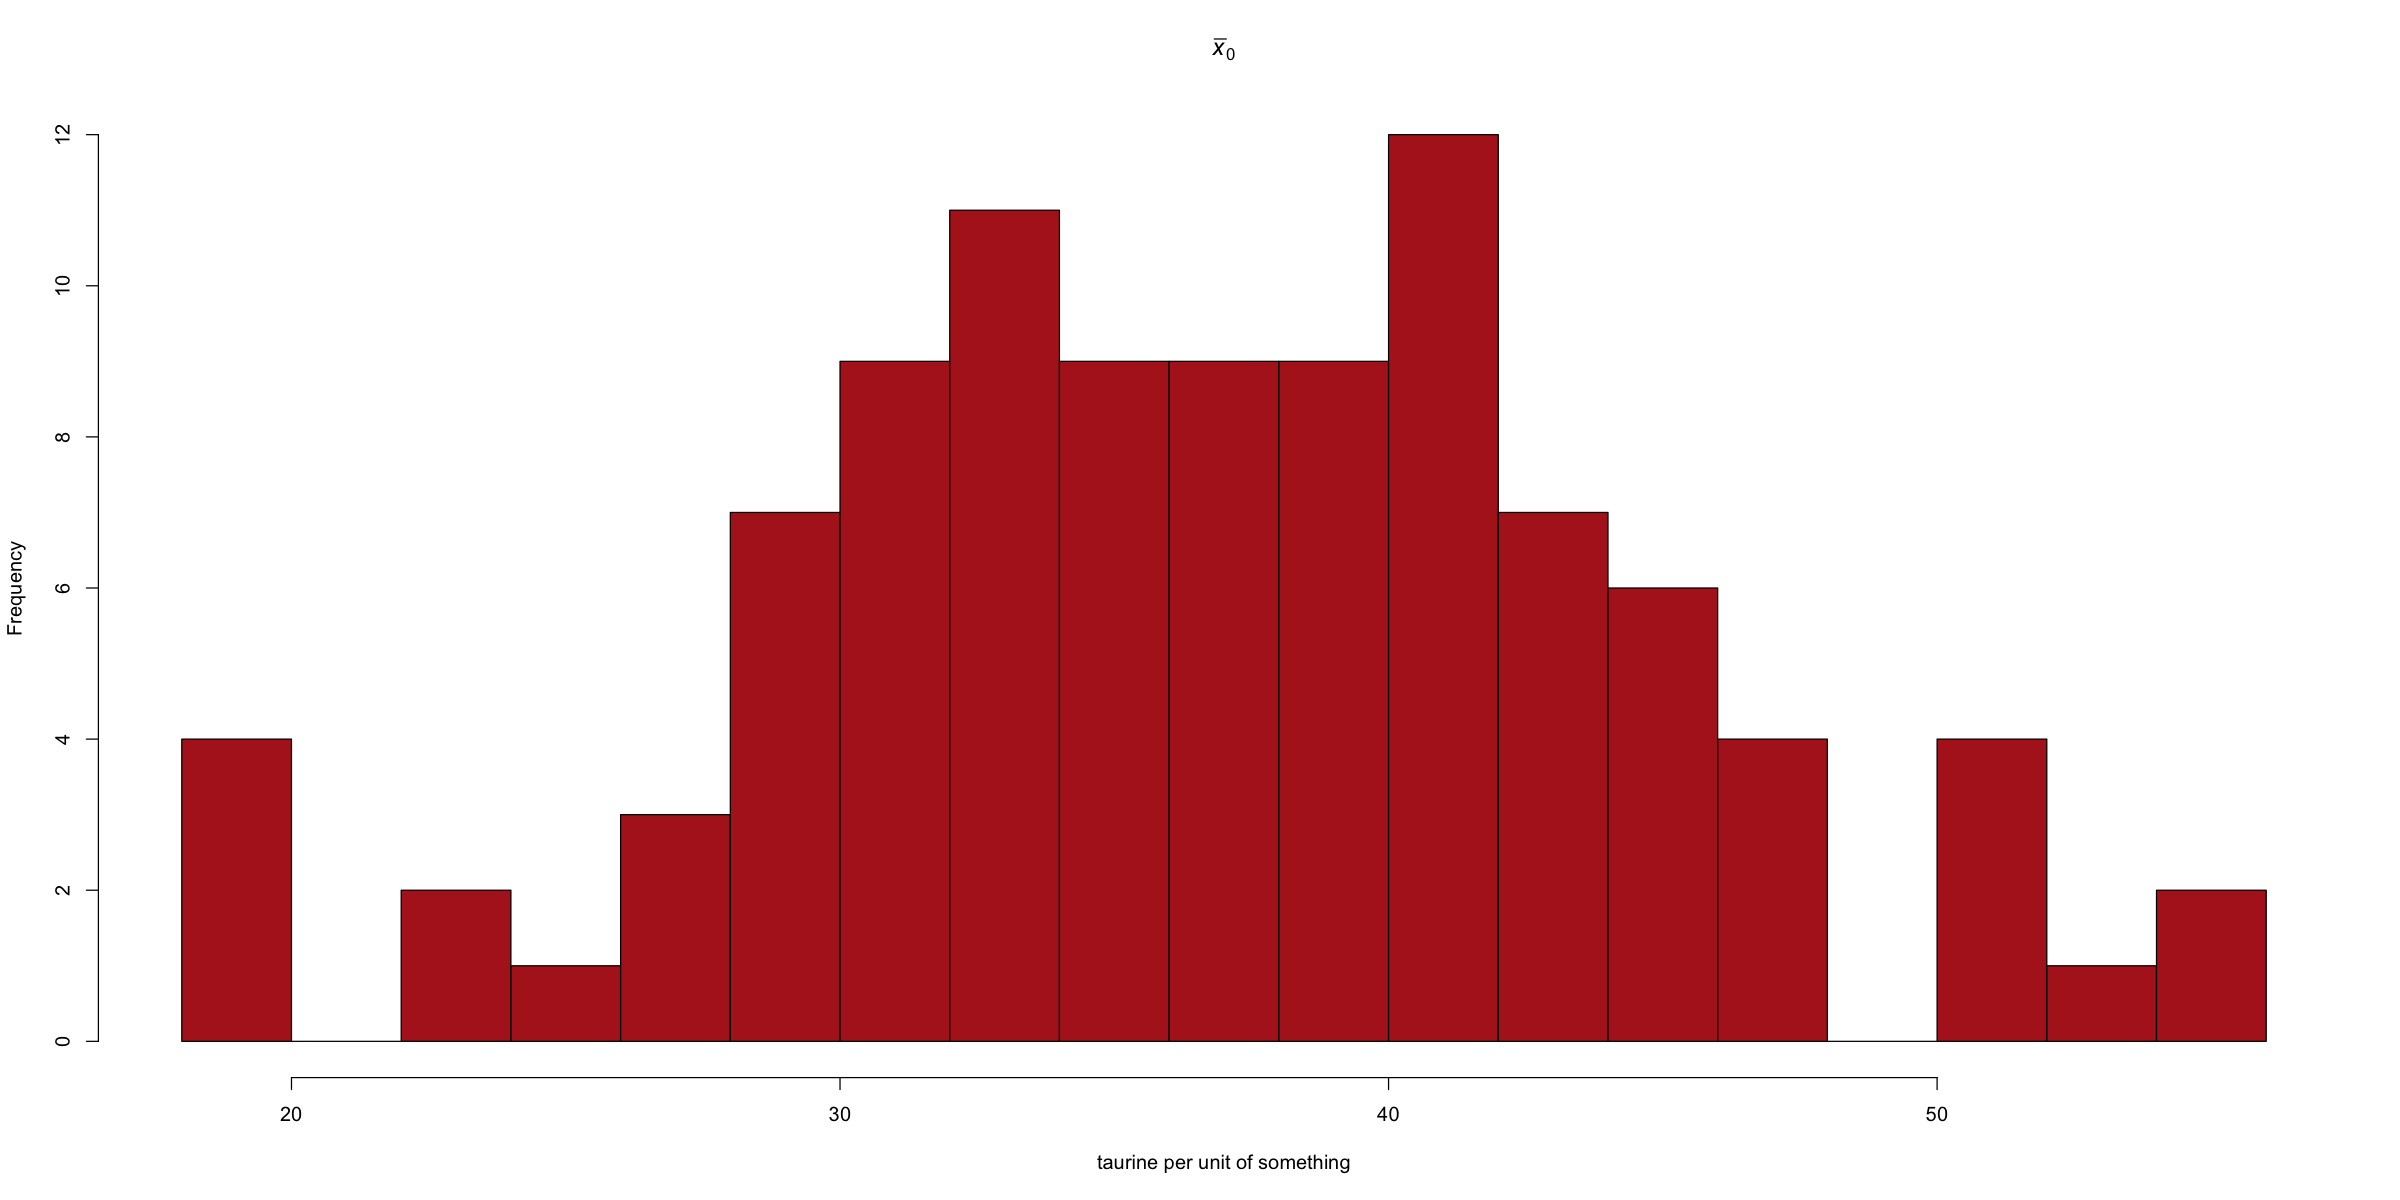

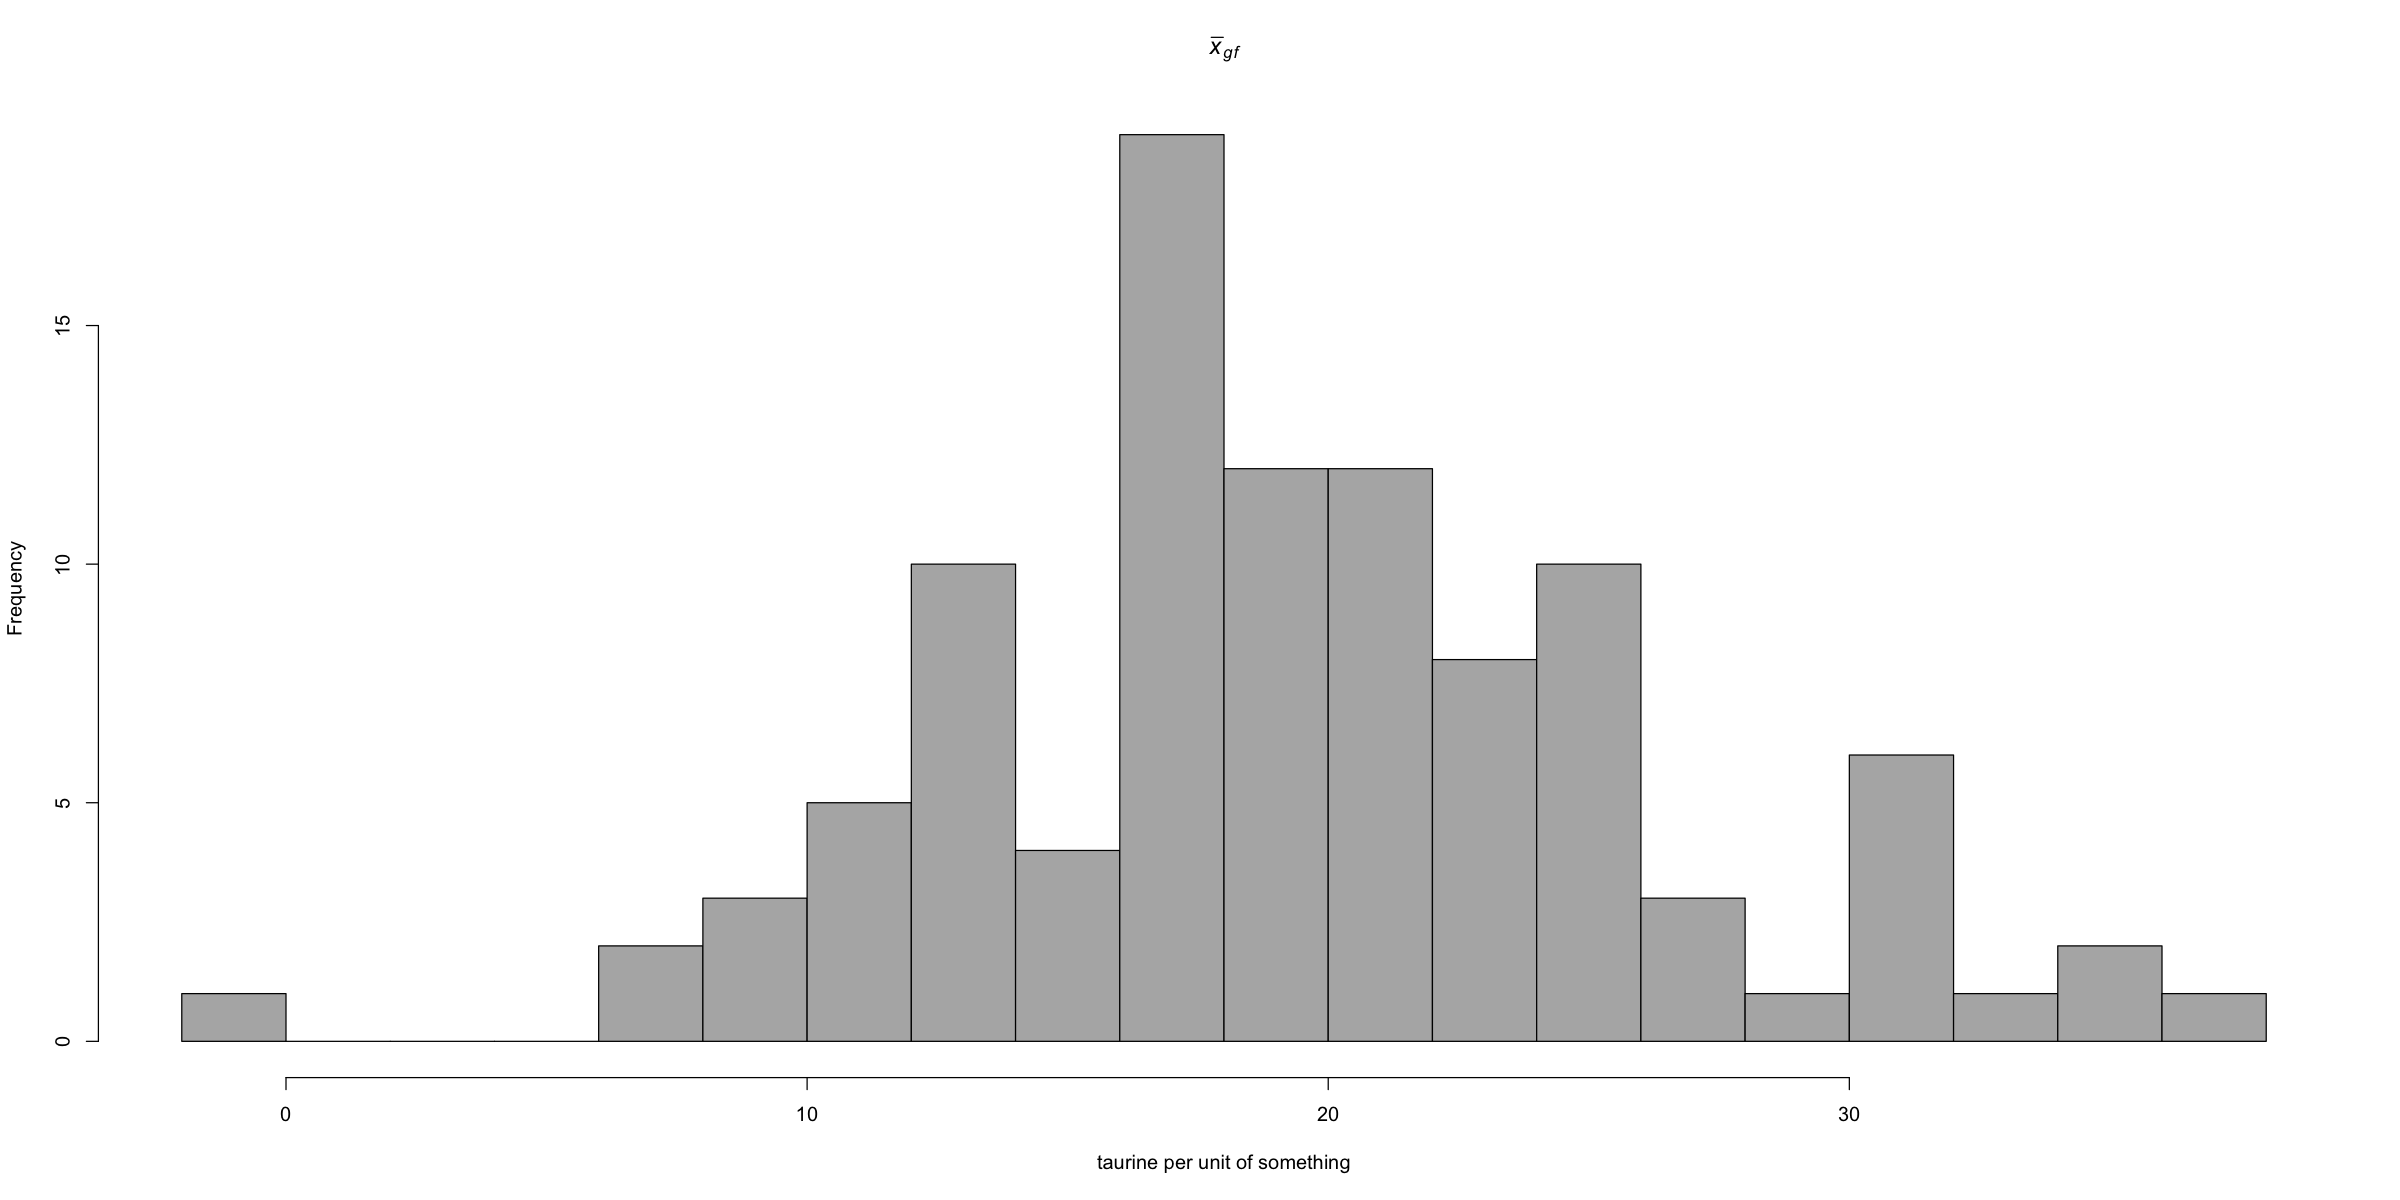

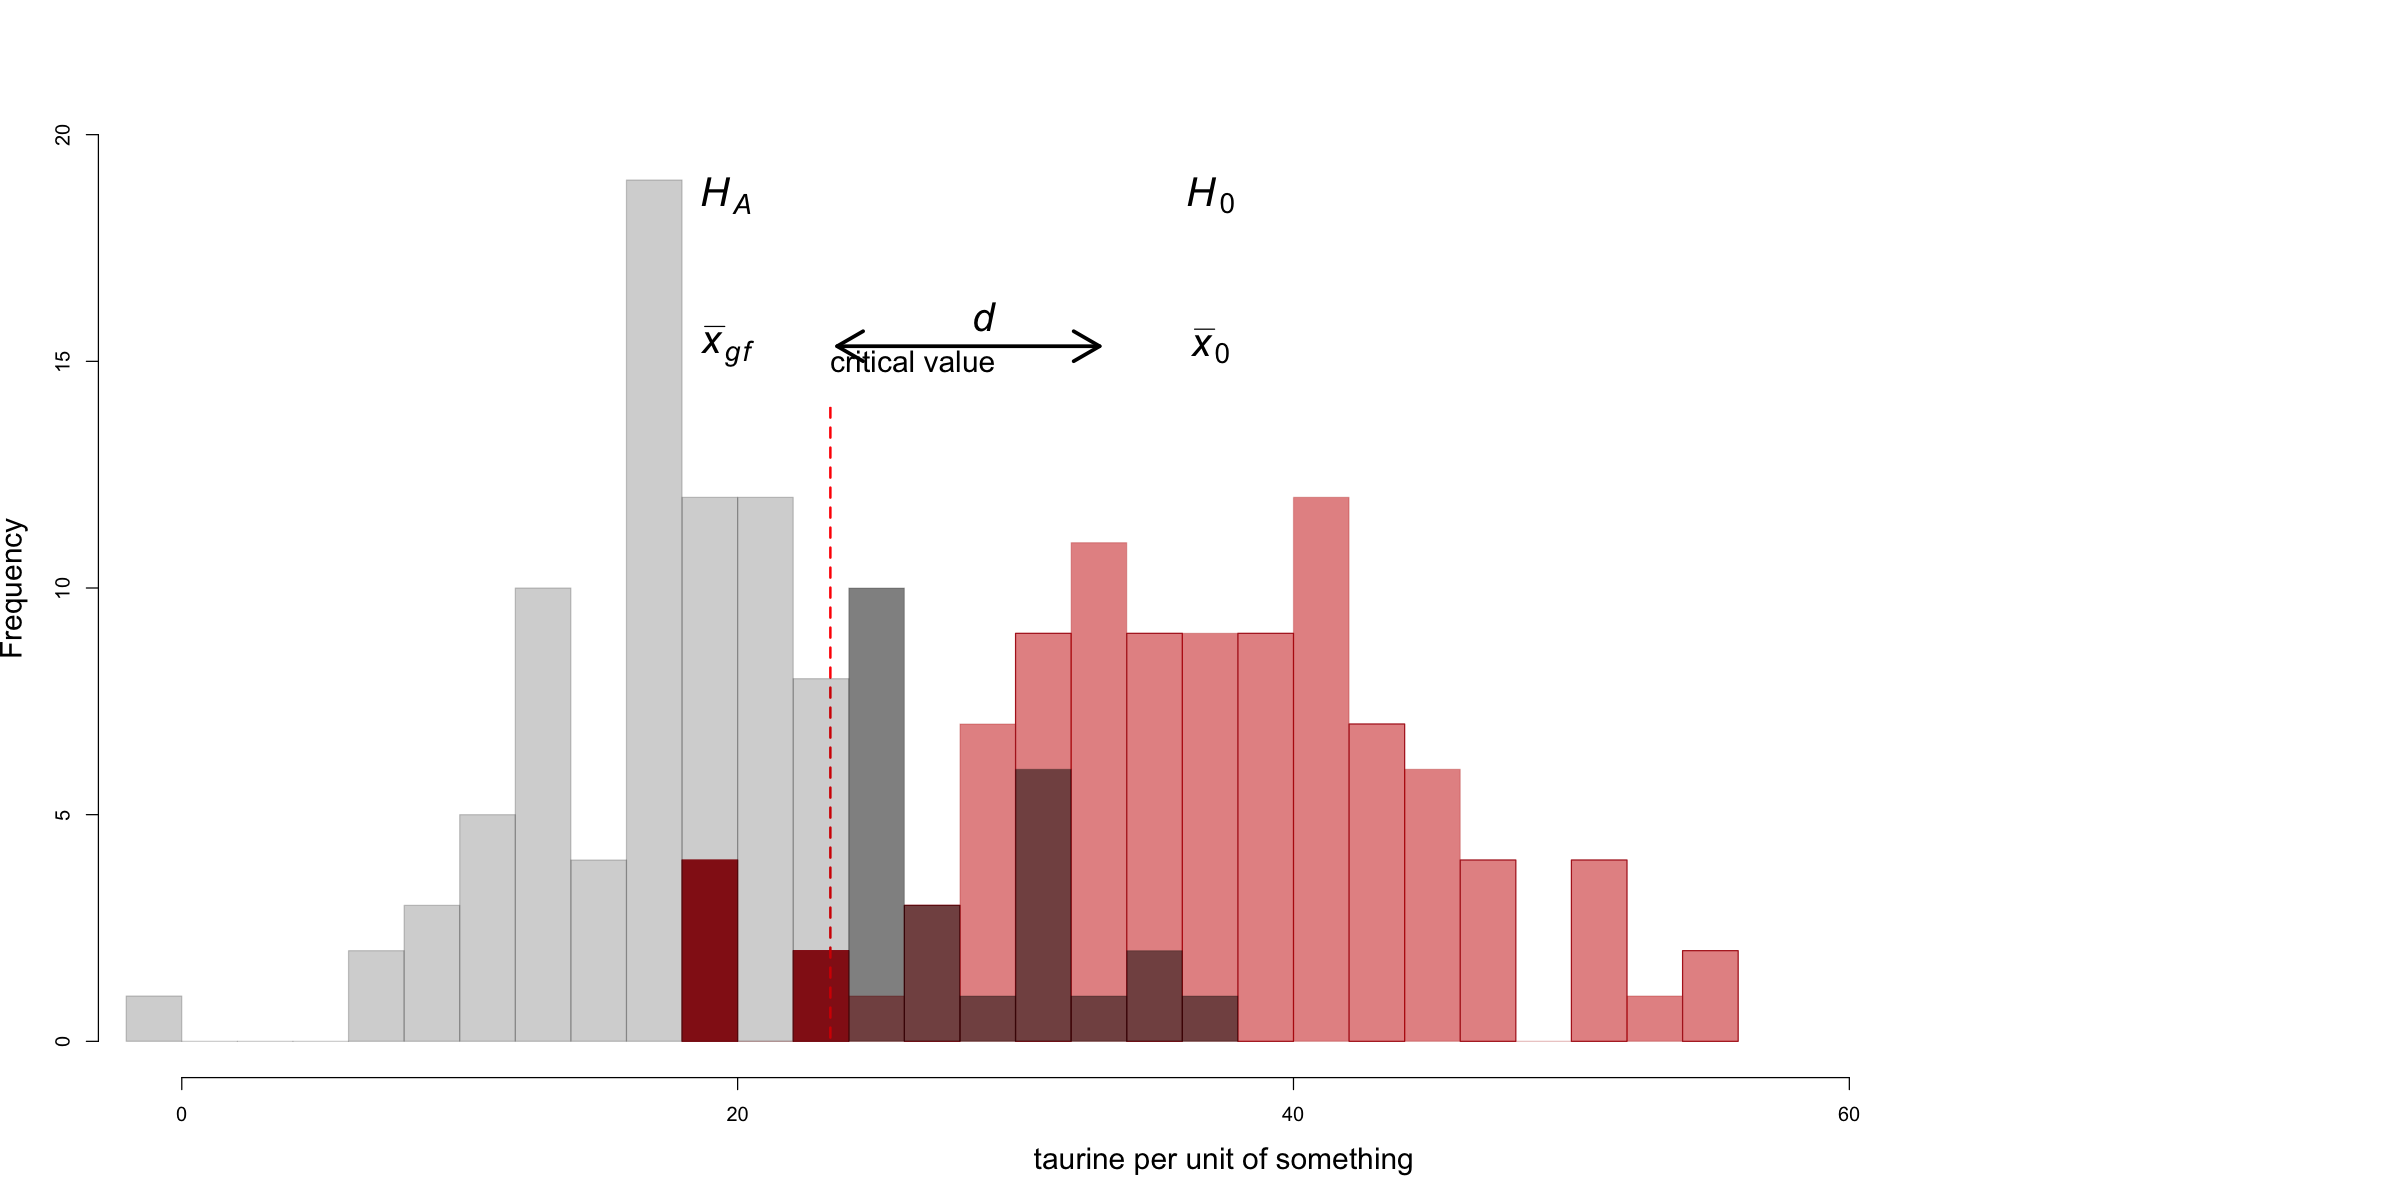

In [60]:
# N = sample size
N = 100

# Sample 1
x_gi = rnorm(N, mean=38.3, sd=8)
# Plot
x_gi_hist=hist(x_gi ,
     breaks=25,
     main=expression(paste(italic(bar(x)[0]))),
     xlab="taurine per unit of something",
     col="firebrick")

# Sample 2
x_gf = rnorm(N, mean=20, sd=8)
# Plot
x_gf_hist=hist(x_gf ,
     breaks=25,
     main=expression(paste(italic(bar(x)[gf]))),
     xlab="taurine per unit of something",
     col="grey70")

# Both samples together
#####################
# H0: Grain-inclusive distribution
# Plot
plot(x_gi_hist,
     col= c("firebrick",rgb(0.8,0,0,1/2))[cut(x_gi_hist$breaks, c(-Inf, max(sort(x_gi)[(1: (length(x_gi)*0.05))]),Inf))],   
     xlim=c(0,75), ylim=c(0,N/5),
     main="", xlab="taurine per unit of something",
     cex.lab=1.5,
     border=c("firebrick",rgb(0.7,0,0,1/4)))
# H0 label
text(x=mean(x_gi), y=max(x_gi_hist$counts) + (N/15),
    label = expression(paste(italic(H[0]))),
    cex=2)
# Mean label 
text(x=mean(x_gi), y=max(x_gi_hist$counts) + (N/30),
    label = expression(paste(italic(bar(x)[0]))),
    cex=2)

# Critical value
ablineclip(v=max(sort(x_gi)[(1: (length(x_gi)*0.05))]+0.8),
           lwd=2, lty=2, col="red",
           y1=0, y2=max(x_gf_hist$counts)-5)
# Critical value
text(x=max(sort(x_gi)[(1: (length(x_gi)*0.05))]+0.8), y=max(x_gf_hist$counts)-4,
    label="critical value", adj=0,cex= 1.5)

# Effect size arrow
arrows(x0=mean(x_gf)+4, x1=mean(x_gi)-4,
       y0=max(x_gi_hist$counts) + (N/30), y1=max(x_gi_hist$counts) + (N/30),
       lty=1, code=3, lwd=3, col="black")
# Effect size label
text(x=mean(x_gf) + (1/4 * mean(x_gi)), y=max(x_gi_hist$counts) + (N/25),
    label = expression(paste(italic(d))),
    cex=2)

#####################
# HA: Grain-free distribution
# Plot GF
plot(x_gf_hist,
     col= c(rgb(0,0,0,0.2), rgb(0,0,0,0.5))[cut(x_gf_hist$breaks, c(-Inf, max(sort(x_gi)[(1: (length(x_gi)*0.05))]),Inf))],  
     xlim=c(0,75),ylim=c(0,N/5),
     add=T, border=rgb(0,0,0,0.2))
# HA label
text(x=mean(x_gf), y=max(x_gi_hist$counts) + (N/15),
    label = expression(paste(italic(H[A]))),
    cex=2)
# Mean label 
text(x=mean(x_gf), y=max(x_gi_hist$counts) + (N/30),
    label = expression(paste(italic(bar(x)[gf]))),
    cex=2, font=2)


Let's decrease $N$ and see what happens:

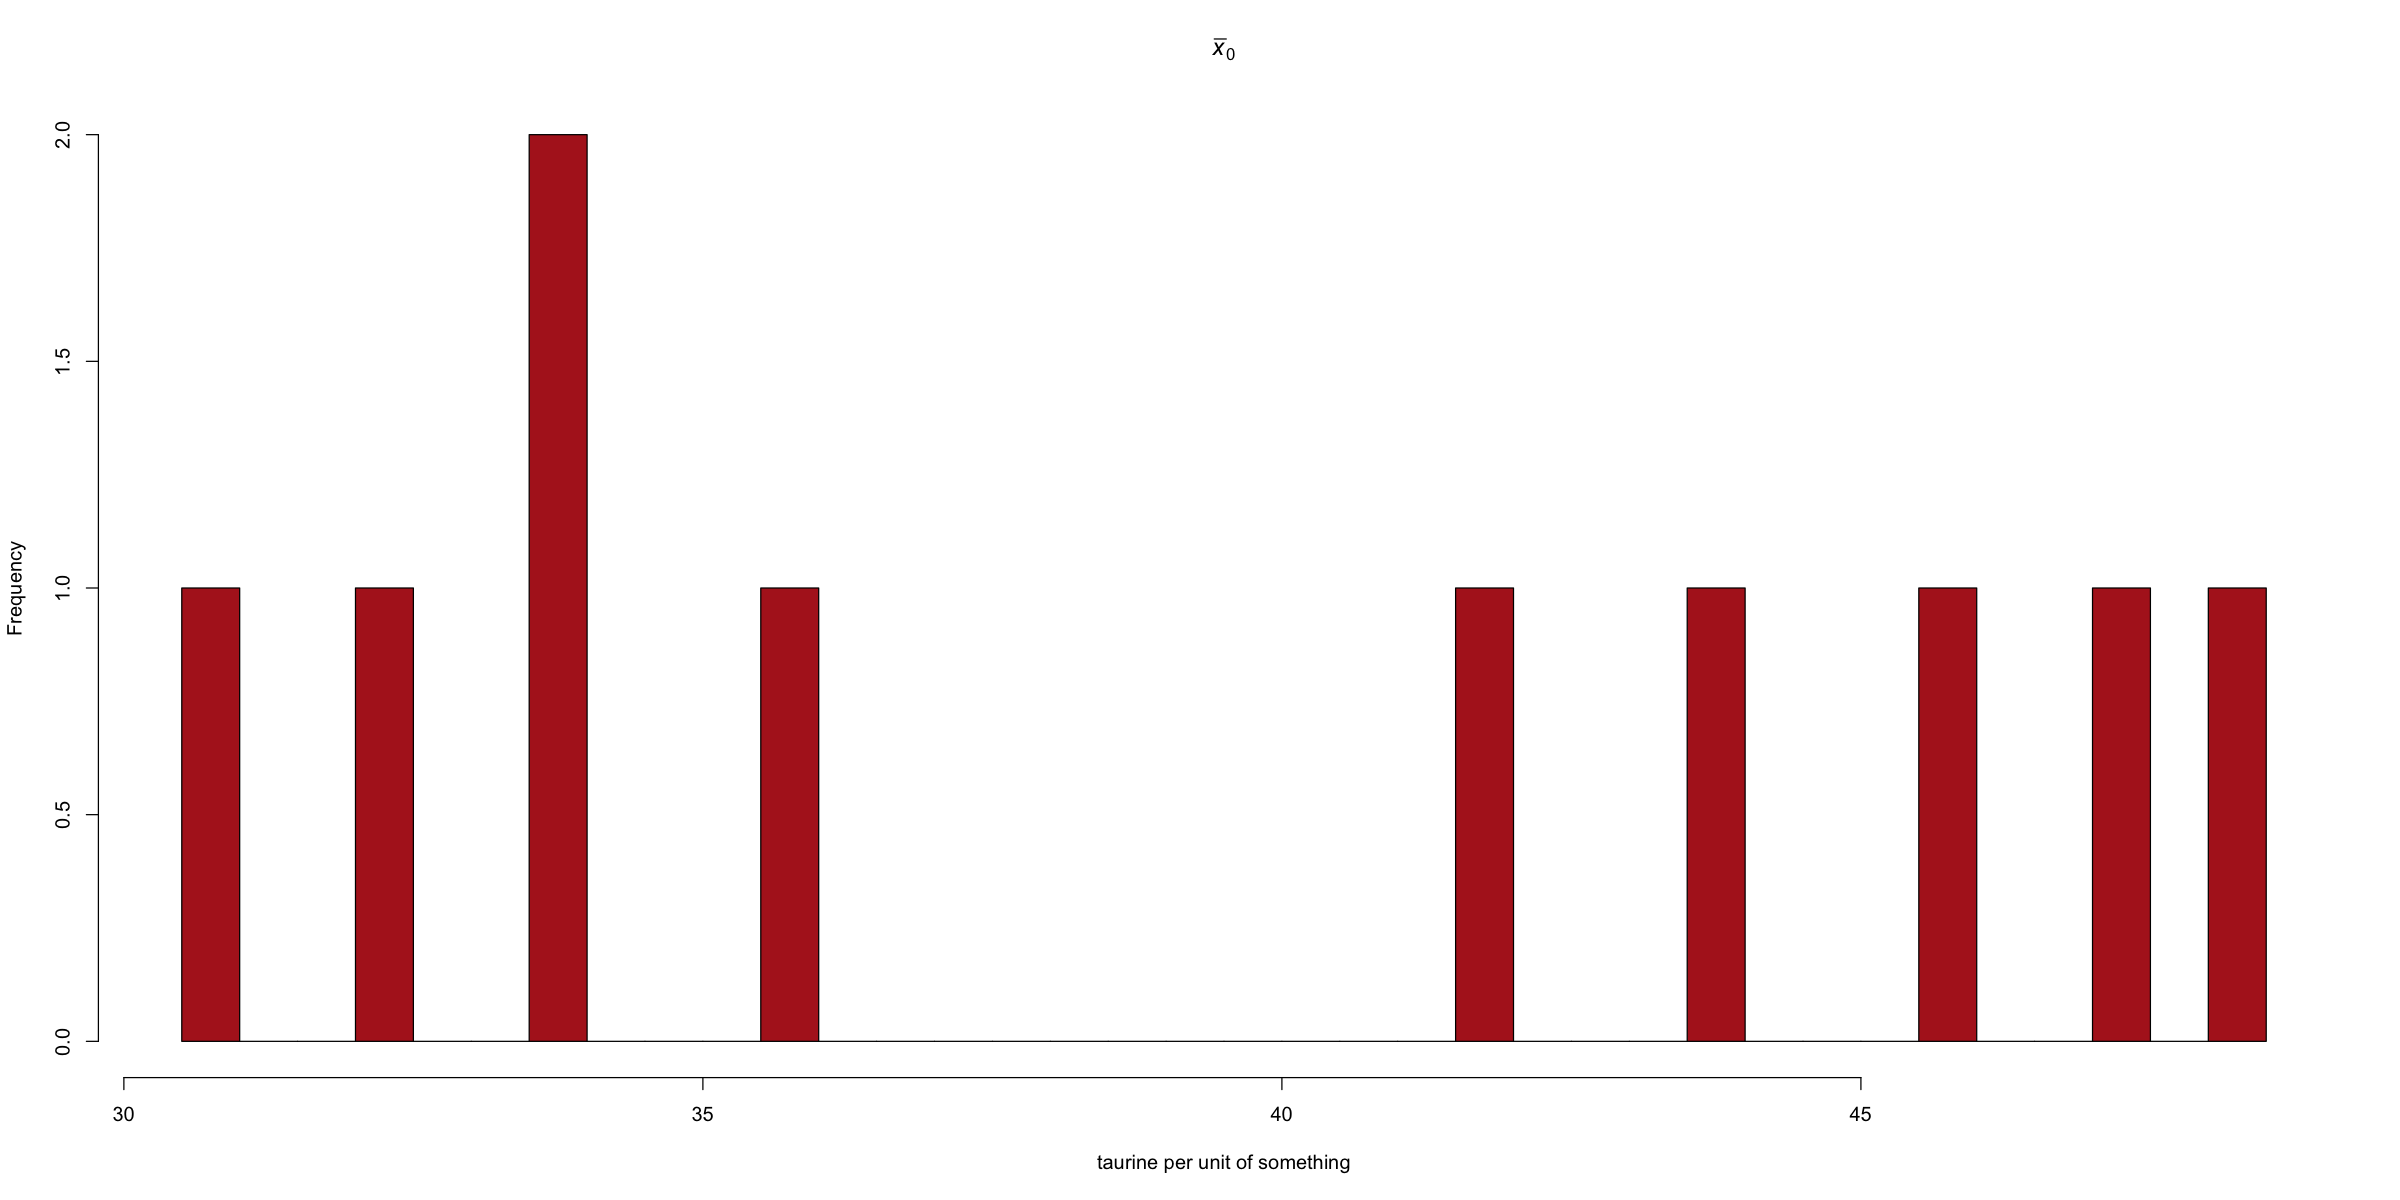

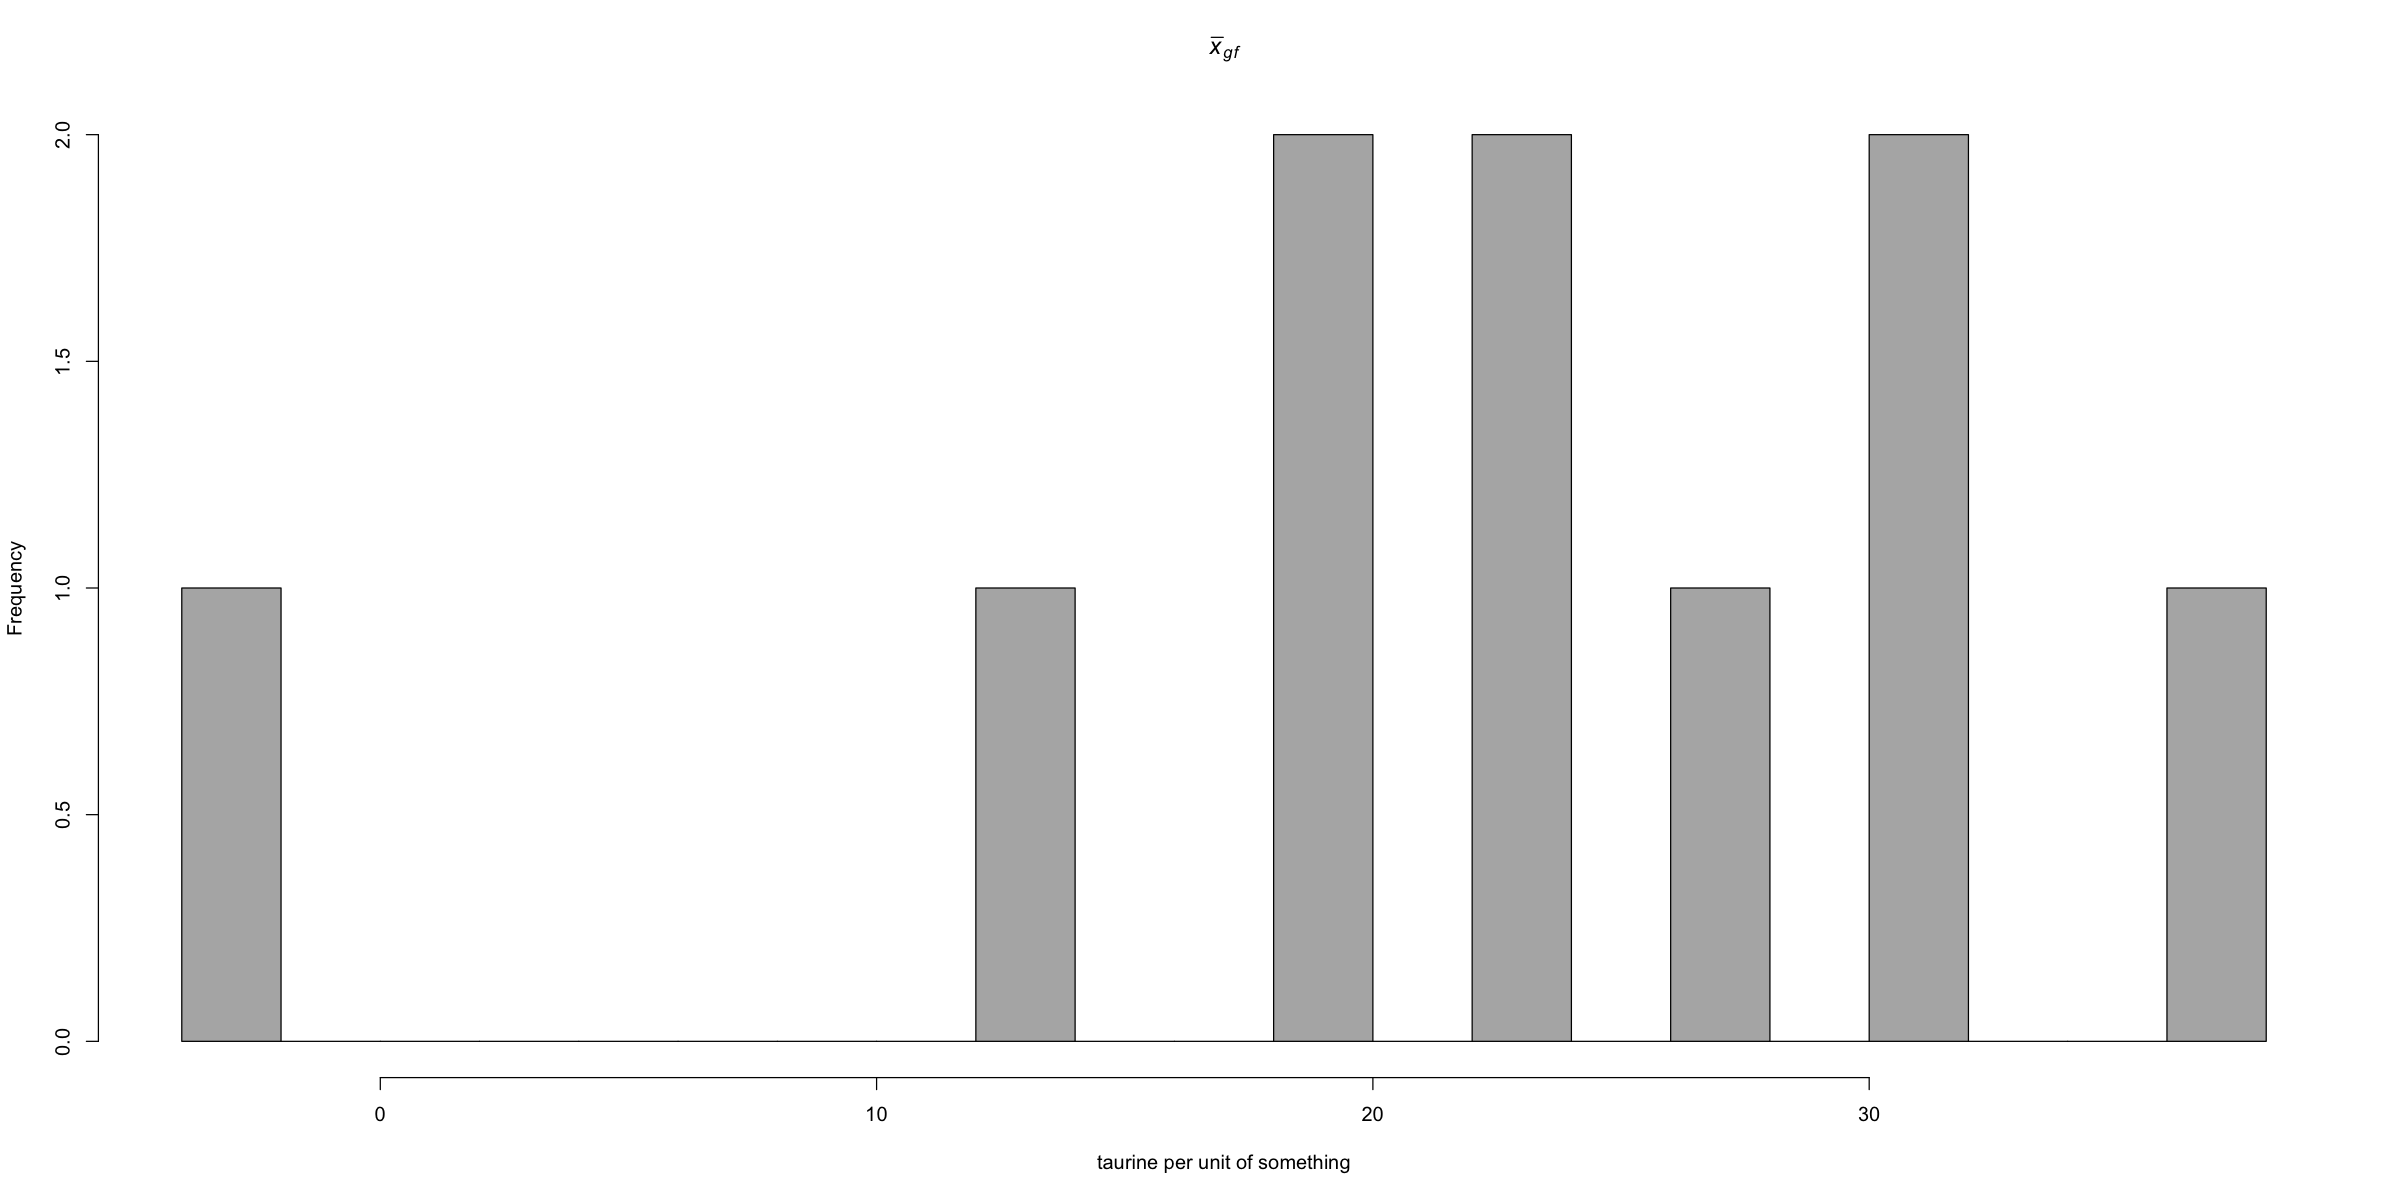

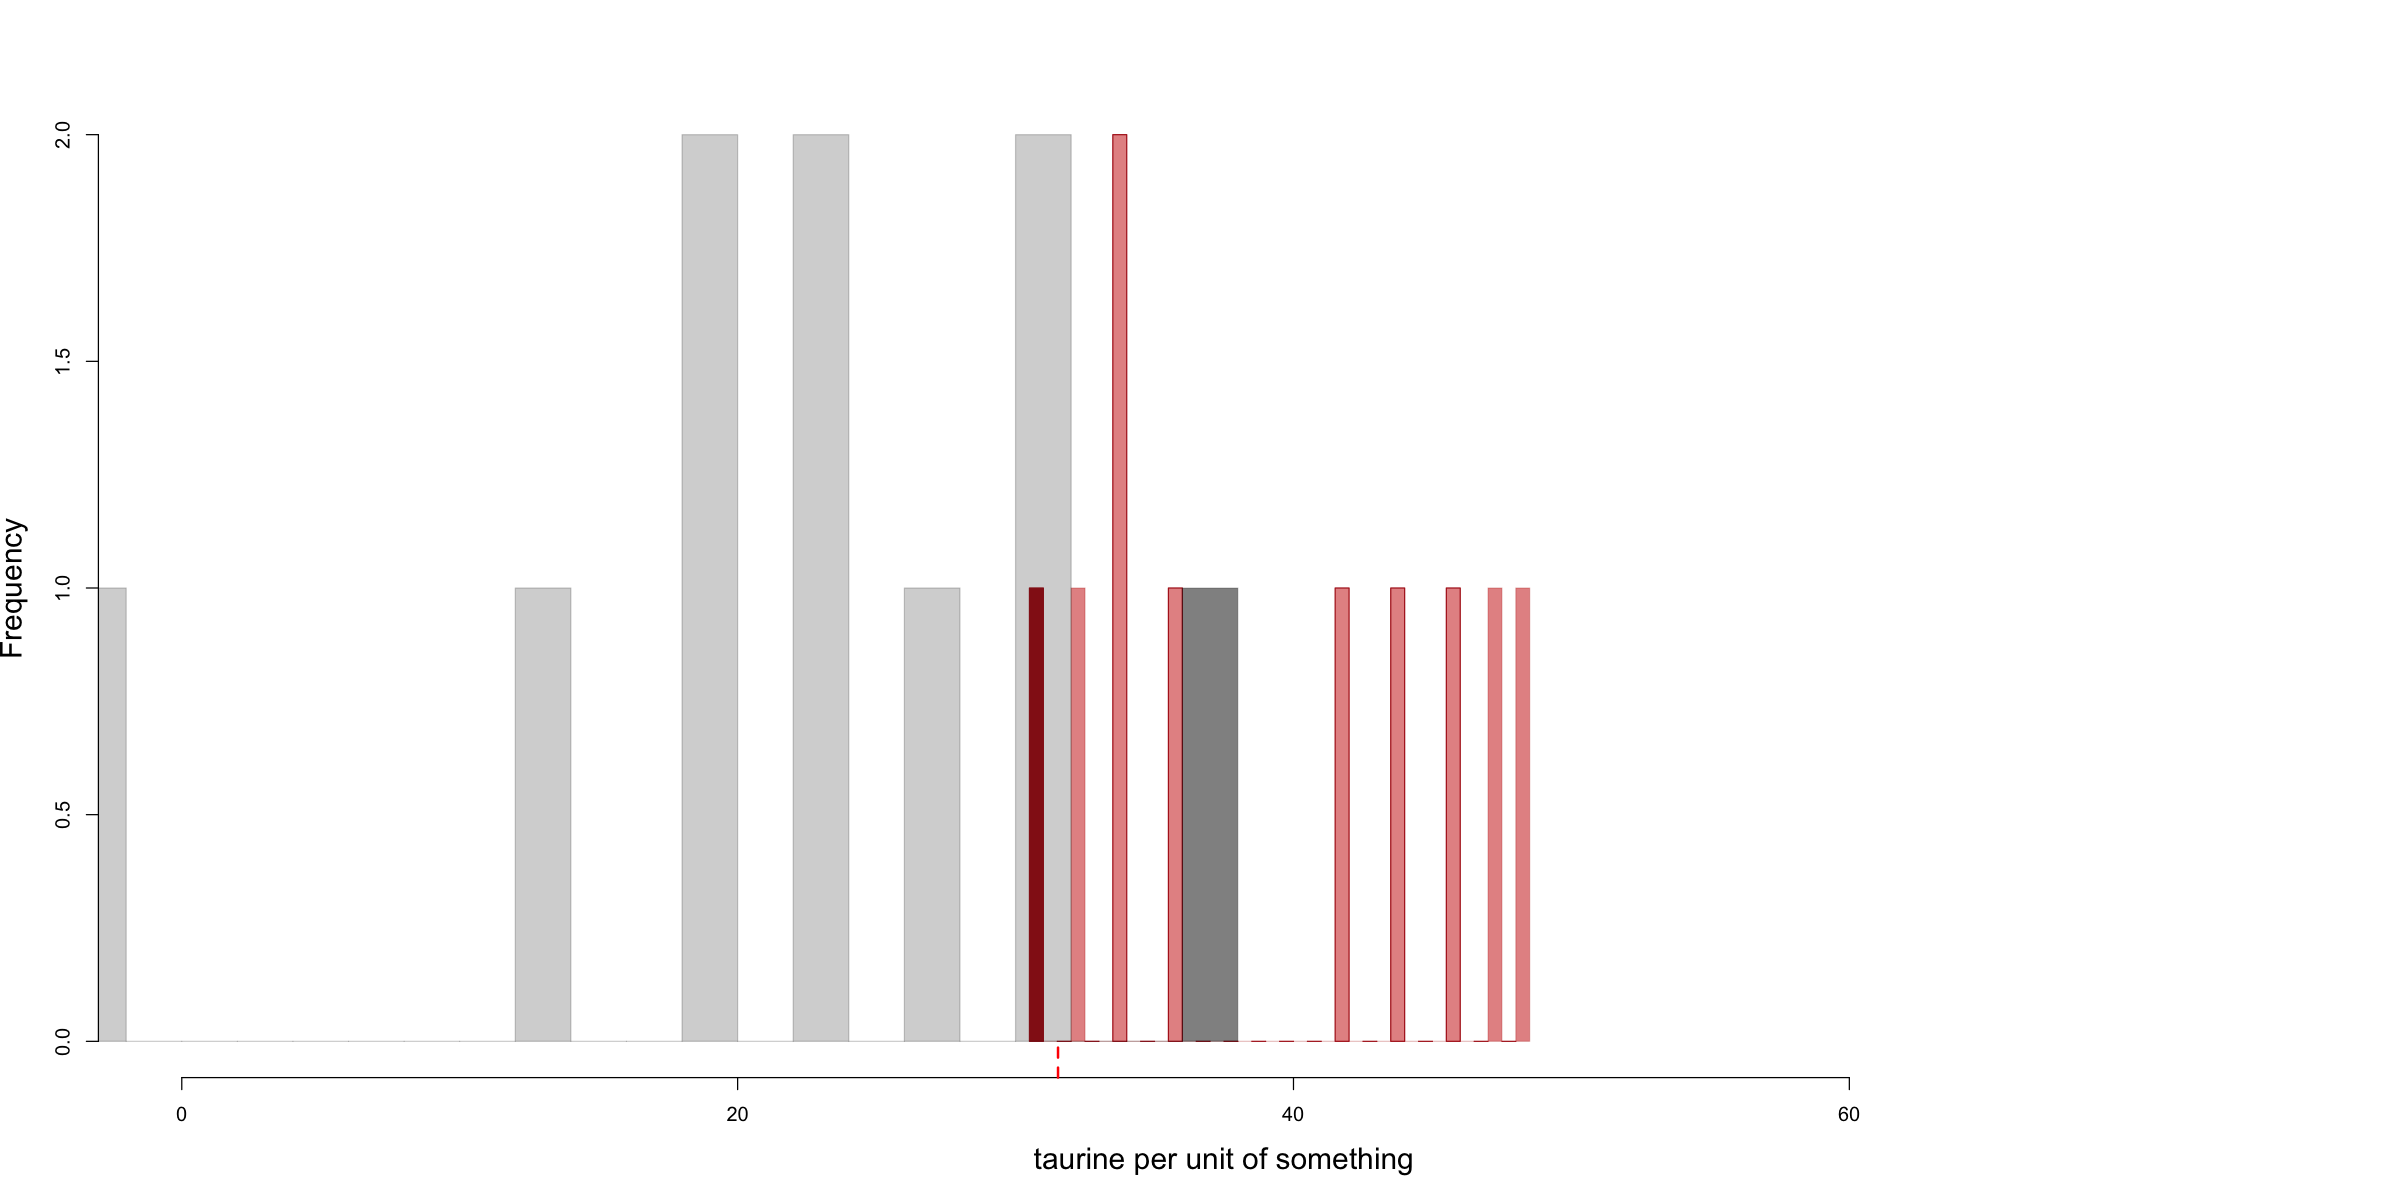

In [61]:
# N = sample size
N = 10

# Sample 1
x_gi = rnorm(N, mean=38.3, sd=8)
# Plot
x_gi_hist=hist(x_gi ,
     breaks=25,
     main=expression(paste(italic(bar(x)[0]))),
     xlab="taurine per unit of something",
     col="firebrick")

# Sample 2
x_gf = rnorm(N, mean=20, sd=8)
# Plot
x_gf_hist=hist(x_gf ,
     breaks=25,
     main=expression(paste(italic(bar(x)[gf]))),
     xlab="taurine per unit of something",
     col="grey70")

# Both samples together
#####################
# H0: Grain-inclusive distribution
# Plot
plot(x_gi_hist,
     col= c("firebrick",rgb(0.8,0,0,1/2))[cut(x_gi_hist$breaks, c(-Inf, max(sort(x_gi)[(1: (length(x_gi)*0.05))]),Inf))],   
     xlim=c(0,75), ylim=c(0,N/5),
     main="", xlab="taurine per unit of something",
     cex.lab=1.5,
     border=c("firebrick",rgb(0.7,0,0,1/4)))
# H0 label
text(x=mean(x_gi), y=max(x_gi_hist$counts) + (N/15),
    label = expression(paste(italic(H[0]))),
    cex=2)
# Mean label 
text(x=mean(x_gi), y=max(x_gi_hist$counts) + (N/30),
    label = expression(paste(italic(bar(x)[0]))),
    cex=2)

# Critical value
ablineclip(v=max(sort(x_gi)[(1: (length(x_gi)*0.05))]+0.8),
           lwd=2, lty=2, col="red",
           y1=0, y2=max(x_gf_hist$counts)-5)
# Critical value
text(x=max(sort(x_gi)[(1: (length(x_gi)*0.05))]+0.8), y=max(x_gf_hist$counts)-4,
    label="critical value", adj=0,cex= 1.5)

# Effect size arrow
arrows(x0=mean(x_gf)+4, x1=mean(x_gi)-4,
       y0=max(x_gi_hist$counts) + (N/30), y1=max(x_gi_hist$counts) + (N/30),
       lty=1, code=3, lwd=3, col="black")
# Effect size label
text(x=mean(x_gf) + (1/4 * mean(x_gi)), y=max(x_gi_hist$counts) + (N/25),
    label = expression(paste(italic(d))),
    cex=2)

#####################
# HA: Grain-free distribution
# Plot GF
plot(x_gf_hist,
     col= c(rgb(0,0,0,0.2), rgb(0,0,0,0.5))[cut(x_gf_hist$breaks, c(-Inf, max(sort(x_gi)[(1: (length(x_gi)*0.05))]),Inf))],  
     xlim=c(0,75),ylim=c(0,N/5),
     add=T, border=rgb(0,0,0,0.2))
# HA label
text(x=mean(x_gf), y=max(x_gi_hist$counts) + (N/15),
    label = expression(paste(italic(H[A]))),
    cex=2)
# Mean label 
text(x=mean(x_gf), y=max(x_gi_hist$counts) + (N/30),
    label = expression(paste(italic(bar(x)[gf]))),
    cex=2, font=2)


## So... how many samples do I need?

...it depends...

The `pwr` package performs power calculations à la Cohen 1988 

In [1]:
pwr.t.test(d=(mean(x_gf)-mean(x_gi))/8,
           power=0.8,
           sig.level=0.05,
           type="one.sample",
           alternative="less")

ERROR: Error in pwr.t.test(d = (mean(x_gf) - mean(x_gi))/8, power = 0.8, sig.level = 0.05, : could not find function "pwr.t.test"


**What if the means were closer?**

In [64]:
pwr.t.test(d=((mean(x_gf)+5)-(mean(x_gi)-5))/8,
           power=0.8,
           sig.level=0.05,
           type="one.sample",
           alternative="less")


     One-sample t test power calculation 

              n = 8.757112
              d = -0.924372
      sig.level = 0.05
          power = 0.8
    alternative = less


**What if the variability was greater**?

In [67]:
pwr.t.test(d=(mean(x_gf)-mean(x_gi))/16,
           power=0.8,
           sig.level=0.05,
           type="one.sample",
           alternative="less")


     One-sample t test power calculation 

              n = 6.803096
              d = -1.087186
      sig.level = 0.05
          power = 0.8
    alternative = less


**What if we were agnostic about the *direction* of the effect**?

In [68]:
pwr.t.test(d=(mean(x_gf)-mean(x_gi))/16,
           power=0.8,
           sig.level=0.05,
           type="one.sample",
           alternative="two.sided")


     One-sample t test power calculation 

              n = 8.750965
              d = 1.087186
      sig.level = 0.05
          power = 0.8
    alternative = two.sided


**What if we were conservative with $\alpha$**?

In [69]:
pwr.t.test(d=(mean(x_gf)-mean(x_gi))/16,
           power=0.8,
           sig.level=0.01,
           type="one.sample",
           alternative="two.sided")


     One-sample t test power calculation 

              n = 13.28897
              d = 1.087186
      sig.level = 0.01
          power = 0.8
    alternative = two.sided


**Note that the `pwr` package contains functions for various applications:**
- one sample proportion
- even and uneven two sample proportions
- one and two sample balanced or unbalanced t-tests
- balanced one-way ANOVA
- $\chi^2$ test
- correlations
- GLMs

## Resources:

- Cohen's book: Cohen, J. (1988). Statistical power analysis for the behavioral sciences (2nd ed.). Hillsdale,NJ: Lawrence Erlbaum.: http://www.utstat.toronto.edu/~brunner/oldclass/378f16/readings/CohenPower.pdf
- Points of significance: power and sample size: https://www.nature.com/articles/nmeth.2738
- For an interactive visualization, see: https://rpsychologist.com/d3/nhst/
- Power calculations in R with pwr à la Cohen (1988): https://cran.r-project.org/web/packages/pwr/pwr.pdf & https://www.statmethods.net/stats/power.html